# Description of work

Overview:

> This project analyze where is the most crowded stations with less amount of vaccinated people

Problem statement:
> The ministry of health unsure where to put the vaccine spots as NYC is an enormous city, and the question arises to where the most effective spots could be with the limited budget. The NYC MTA subway is used in about 40% of new yorkers, putting a vaccine spot near everywhere is infeasible due to over-budget (NYC has about 500 subway stations).

Scope of work:
> In the MTA dataset, the sample could be where the most crowded areas/subways and using the second dataset to verify where is the most crowded areas with the least amount of vaccinated people. four months (May to August) of both datasets will be used for the analysis, and the reason is NYC started massive vaccine distrubution in the previous four months.

Datasets:
* Datasets with description:
This project based on the following datasets:

> MTA Turnstile dataset located at http://web.mta.info/developers/turnstile.html. <br />
The NYC MTA Turnstile data has cumulated number of entries and exits for each station in different dates and time. 

> Public NYChealth COVID-19 vaccine dataset located at https://github.com/nychealth/covid-vaccine-data. <br />
The NYChealth COVID-19 vaccine data provides inforamtion about the vaccine percentage of each NYC district.

> MTA stations mapped to zipcodes dataset <br />https://raw.githubusercontent.com/reiffs/202107_Reiff_Metis_EDA_Project/d570eb9a8827ce14e7fbc3c632775c00fb5d332f/raw_data_sets/station_zips.csv </br>
> This CSV file maps each station with it's corrsponding zip code.

--------------------------------------------------------------------------------------------------

# Saving data to datebase (only one run)




In [ ]:
# Source: http://web.mta.info/developers/turnstile.html
# Modified function from MTA pairs1 
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)

last_date = {8:28,7:31,6:26,5:29} # The last day of each four months recorded in the MTA dataset  
week_nums = []  
for i in reversed(range(5,9)): 
    count = last_date[i]
    while(count > 0):
        week = '21'+"{:02d}".format(i)+"{:02d}".format(count)
        week_nums.append(week)
        count = count - 7
        
turnstiles_df = get_data(week_nums)

In [ ]:
engine = create_engine("sqlite:///MTA_data.db")
turnstiles_df.to_sql("MTAdata",engine, if_exists='replace', index = False)

--------------------------------------------------------------------------------------------------

# Importing and exploring the data

In [ ]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from sqlalchemy import create_engine
# to remove the exra zeros after decimal point
pd.set_option('display.float_format', lambda x: '%.0f' % x)
#Fonts for plots
csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Helvetica'}

In [ ]:
#Connecting to sqlalchemy engine
engine = create_engine("sqlite:///MTA_data.db")
all_tables = engine.table_names()
print(all_tables)

['MTAdata']


/var/folders/0r/78x4fk3n76q1x_swj64_76f40000gn/T/ipykernel_4145/1126923348.py:3: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  all_tables = engine.table_names()


In [ ]:
turnstiles_df = pd.read_sql('SELECT * FROM MTAdata;', engine) # Reading table from sql database
turnstiles_df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,00:00:00,REGULAR,7622548,2607689
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,04:00:00,REGULAR,7622561,2607697
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,08:00:00,REGULAR,7622573,2607718
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,12:00:00,REGULAR,7622604,2607766
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,16:00:00,REGULAR,7622715,2607802
...,...,...,...,...,...,...,...,...,...,...,...
3768016,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/30/2021,05:00:00,REGULAR,5554,547
3768017,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/30/2021,09:00:00,REGULAR,5554,547
3768018,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/30/2021,13:00:00,REGULAR,5554,547
3768019,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/30/2021,17:00:00,REGULAR,5554,547


In [ ]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,00:00:00,REGULAR,7622548,2607689
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,04:00:00,REGULAR,7622561,2607697
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,08:00:00,REGULAR,7622573,2607718
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,12:00:00,REGULAR,7622604,2607766
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,16:00:00,REGULAR,7622715,2607802


In [ ]:
turnstiles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3768021 entries, 0 to 3768020
Data columns (total 11 columns):
 #   Column                                                                Dtype 
---  ------                                                                ----- 
 0   C/A                                                                   object
 1   UNIT                                                                  object
 2   SCP                                                                   object
 3   STATION                                                               object
 4   LINENAME                                                              object
 5   DIVISION                                                              object
 6   DATE                                                                  object
 7   TIME                                                                  object
 8   DESC                                                          

In [ ]:
Numberofdays = len(turnstiles_df.DATE.unique())
print("There are: " , Numberofdays , " different days")

There are:  126  different days


In [ ]:
# from datetime import datetime as dt
# Take the date and time fields into a single datetime column
turnstiles_df["DATE_TIME"] = pd.to_datetime(turnstiles_df.DATE + " " + turnstiles_df.TIME)

In [ ]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,00:00:00,REGULAR,7622548,2607689,2021-08-21 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,04:00:00,REGULAR,7622561,2607697,2021-08-21 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,08:00:00,REGULAR,7622573,2607718,2021-08-21 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,12:00:00,REGULAR,7622604,2607766,2021-08-21 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,16:00:00,REGULAR,7622715,2607802,2021-08-21 16:00:00


In [ ]:
#remove whitespace from the column titles
turnstiles_df.columns = [column.strip() for column in turnstiles_df.columns]
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS', 'DATE_TIME'],
      dtype='object')

In [ ]:
#The Idea of combining rows into one turnstile is to reduce the memory consummation
turnstiles_df["TURNSTILE ID"] = turnstiles_df.STATION + ' ' + turnstiles_df.UNIT +  ' ' + turnstiles_df['C/A'] +  ' ' +  turnstiles_df.SCP
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,TURNSTILE ID
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,00:00:00,REGULAR,7622548,2607689,2021-08-21 00:00:00,59 ST R051 A002 02-00-00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,04:00:00,REGULAR,7622561,2607697,2021-08-21 04:00:00,59 ST R051 A002 02-00-00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,08:00:00,REGULAR,7622573,2607718,2021-08-21 08:00:00,59 ST R051 A002 02-00-00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,12:00:00,REGULAR,7622604,2607766,2021-08-21 12:00:00,59 ST R051 A002 02-00-00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,16:00:00,REGULAR,7622715,2607802,2021-08-21 16:00:00,59 ST R051 A002 02-00-00


In [ ]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(turnstiles_df.groupby(['STATION','TURNSTILE ID','DATE_TIME']).ENTRIES.count().reset_index().sort_values("ENTRIES", ascending=False)).head(10)

,STATION,TURNSTILE ID,DATE_TIME,ENTRIES
590915,33 ST-RAWSON ST,33 ST-RAWSON ST R291 R516 00-00-02,2021-08-26 08:00:00,2
2833386,KINGS HWY,KINGS HWY R211 B024 00-05-00,2021-05-06 08:00:00,2
590911,33 ST-RAWSON ST,33 ST-RAWSON ST R291 R516 00-00-02,2021-08-25 16:00:00,2
590910,33 ST-RAWSON ST,33 ST-RAWSON ST R291 R516 00-00-02,2021-08-25 12:00:00,2
1452057,ASTORIA BLVD,ASTORIA BLVD R094 R514 00-05-00,2021-07-22 00:00:00,2
1452058,ASTORIA BLVD,ASTORIA BLVD R094 R514 00-05-00,2021-07-22 04:00:00,2
590909,33 ST-RAWSON ST,33 ST-RAWSON ST R291 R516 00-00-02,2021-08-25 08:00:00,2
590908,33 ST-RAWSON ST,33 ST-RAWSON ST R291 R516 00-00-02,2021-08-25 04:00:00,2
1452061,ASTORIA BLVD,ASTORIA BLVD R094 R514 00-05-00,2021-07-22 08:00:00,2
1452062,ASTORIA BLVD,ASTORIA BLVD R094 R514 00-05-00,2021-07-22 12:00:00,2


In [ ]:
#What are of type of DESC avaliable.
turnstiles_df.DESC.unique()

array(['REGULAR', 'RECOVR AUD'], dtype=object)

In [ ]:
# Get rid of the duplicate entry
#Let get rid of RECOVER AUD 
# turnstiles_df = turnstiles_df[turnstiles_df.DESC == 'REGULAR']
turnstiles_df.sort_values(['STATION','TURNSTILE ID','DATE_TIME'], inplace=True, ascending=False)
turnstiles_df.drop_duplicates( subset=['STATION','TURNSTILE ID','DATE_TIME'] , inplace=True)

In [ ]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(turnstiles_df
 .groupby(['STATION','TURNSTILE ID','DATE_TIME'])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(10)

,STATION,TURNSTILE ID,DATE_TIME,ENTRIES
0,1 AV,1 AV R248 H007 00-00-00,2021-04-24 00:00:00,1
2511958,GRD CNTRL-42 ST,GRD CNTRL-42 ST R046 R238 00-07-01,2021-07-15 12:00:00,1
2511960,GRD CNTRL-42 ST,GRD CNTRL-42 ST R046 R238 00-07-01,2021-07-15 20:00:00,1
2511961,GRD CNTRL-42 ST,GRD CNTRL-42 ST R046 R238 00-07-01,2021-07-16 00:00:00,1
2511962,GRD CNTRL-42 ST,GRD CNTRL-42 ST R046 R238 00-07-01,2021-07-16 04:00:00,1
2511963,GRD CNTRL-42 ST,GRD CNTRL-42 ST R046 R238 00-07-01,2021-07-16 08:00:00,1
2511964,GRD CNTRL-42 ST,GRD CNTRL-42 ST R046 R238 00-07-01,2021-07-16 12:00:00,1
2511965,GRD CNTRL-42 ST,GRD CNTRL-42 ST R046 R238 00-07-01,2021-07-16 16:00:00,1
2511966,GRD CNTRL-42 ST,GRD CNTRL-42 ST R046 R238 00-07-01,2021-07-16 20:00:00,1
2511967,GRD CNTRL-42 ST,GRD CNTRL-42 ST R046 R238 00-07-01,2021-07-17 00:00:00,1


In [ ]:
turnstiles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3768021 entries, 0 to 3768020
Data columns (total 13 columns):
 #   Column        Dtype         
---  ------        -----         
 0   C/A           object        
 1   UNIT          object        
 2   SCP           object        
 3   STATION       object        
 4   LINENAME      object        
 5   DIVISION      object        
 6   DATE          object        
 7   TIME          object        
 8   DESC          object        
 9   ENTRIES       int64         
 10  EXITS         int64         
 11  DATE_TIME     datetime64[ns]
 12  TURNSTILE ID  object        
dtypes: datetime64[ns](1), int64(2), object(10)
memory usage: 373.7+ MB


In [ ]:
#Is theory of grouping turnstile id are valid ?
turnstiles_df.groupby(['STATION','UNIT', 'C/A', 'SCP','DATE_TIME']).sum().reset_index().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3767951 entries, 0 to 3767950
Data columns (total 7 columns):
 #   Column     Dtype         
---  ------     -----         
 0   STATION    object        
 1   UNIT       object        
 2   C/A        object        
 3   SCP        object        
 4   DATE_TIME  datetime64[ns]
 5   ENTRIES    int64         
 6   EXITS      int64         
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 201.2+ MB


In [ ]:
#grouping by turnstiles locations and summing entries/exits by date
turnstiles_df = turnstiles_df.groupby(['STATION','TURNSTILE ID','DATE_TIME']).sum().reset_index()

In [ ]:
turnstiles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3767951 entries, 0 to 3767950
Data columns (total 5 columns):
 #   Column        Dtype         
---  ------        -----         
 0   STATION       object        
 1   TURNSTILE ID  object        
 2   DATE_TIME     datetime64[ns]
 3   ENTRIES       int64         
 4   EXITS         int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 143.7+ MB


In [ ]:
Numberofturnstile = len(turnstiles_df["TURNSTILE ID"].unique())
print("There are: " , Numberofturnstile , " different TURNSTILEs")

There are:  5032  different TURNSTILEs


--------------------------------------------------------------------------------------------------

# Analyzing outliers and removing them.

In [ ]:
turnstiles_df

,STATION,TURNSTILE ID,DATE_TIME,ENTRIES,EXITS
0,1 AV,1 AV R248 H007 00-00-00,2021-04-24 00:00:00,15554607,17751328
1,1 AV,1 AV R248 H007 00-00-00,2021-04-24 04:00:00,15554617,17751380
2,1 AV,1 AV R248 H007 00-00-00,2021-04-24 08:00:00,15554624,17751548
3,1 AV,1 AV R248 H007 00-00-00,2021-04-24 12:00:00,15554671,17751901
4,1 AV,1 AV R248 H007 00-00-00,2021-04-24 16:00:00,15554767,17752536
...,...,...,...,...,...
3767946,ZEREGA AV,ZEREGA AV R326 R419 00-05-01,2021-08-27 05:00:00,39,182
3767947,ZEREGA AV,ZEREGA AV R326 R419 00-05-01,2021-08-27 09:00:00,39,182
3767948,ZEREGA AV,ZEREGA AV R326 R419 00-05-01,2021-08-27 13:00:00,39,182
3767949,ZEREGA AV,ZEREGA AV R326 R419 00-05-01,2021-08-27 17:00:00,39,182


/Users/yazeed/miniforge3/envs/MLenva/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/yazeed/miniforge3/envs/MLenva/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'cumulative probability distribution of entries'}, xlabel='ENTRIES', ylabel='Density'>

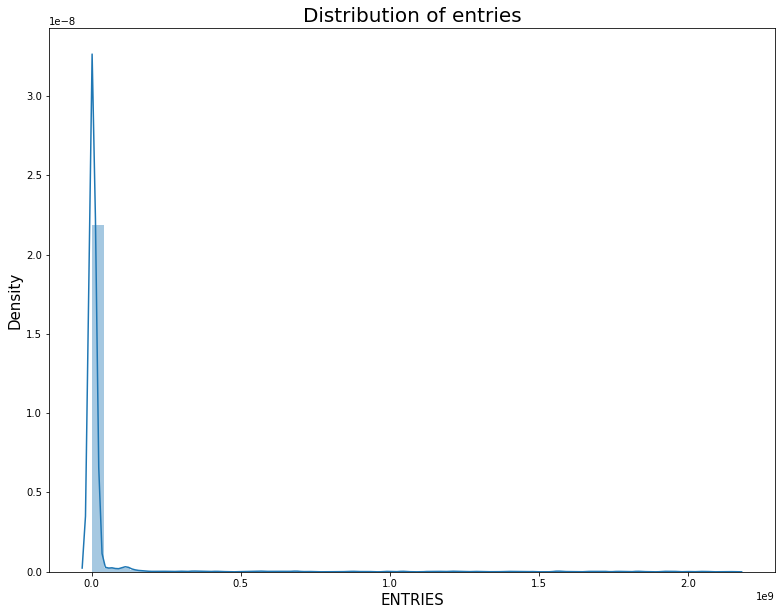

<Figure size 432x288 with 0 Axes>

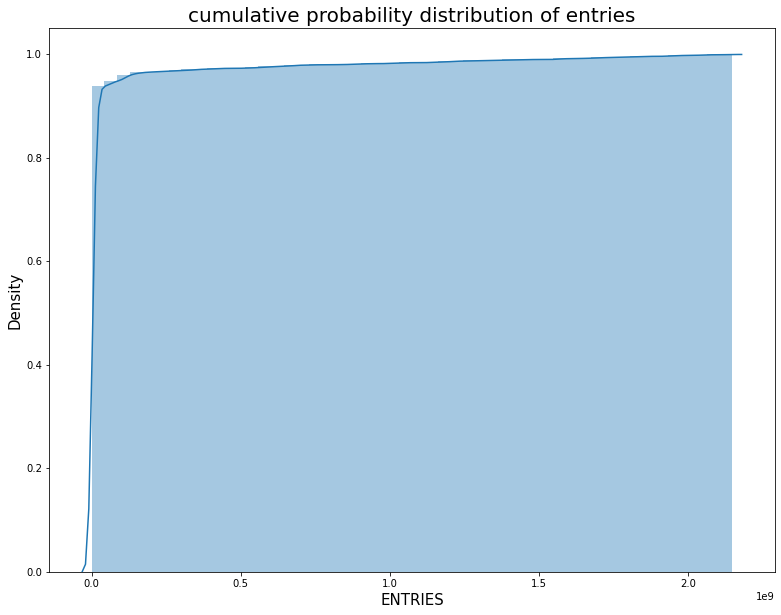

In [ ]:
#check the distribution of records for entries

plt.figure(figsize=(13,10))
plt.title("Distribution of entries", fontsize=20);
plt.xlabel("Entries", fontsize=15)
plt.ylabel("Density", fontsize=15)
sns.distplot( turnstiles_df.ENTRIES)
plt.figure()

plt.figure(figsize=(13,10))
plt.title("cumulative probability distribution of entries", fontsize=20);
plt.xlabel("Entries", fontsize=15)
plt.ylabel("Density", fontsize=15)
sns.distplot( turnstiles_df.ENTRIES,hist_kws={"cumulative":True},kde_kws={"cumulative":True})


C:\Users\yazeed\anaconda3\envs\tf2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ENTRIES'>

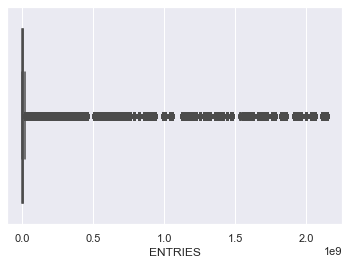

In [ ]:
#Boxplot to find outliers
sns.boxplot(turnstiles_df.ENTRIES)

In [ ]:
turnstiles_df

,STATION,TURNSTILE ID,DATE_TIME,ENTRIES,EXITS
0,1 AV,1 AV R248 H007 00-00-00,2021-04-24 00:00:00,15554607,17751328
1,1 AV,1 AV R248 H007 00-00-00,2021-04-24 04:00:00,15554617,17751380
2,1 AV,1 AV R248 H007 00-00-00,2021-04-24 08:00:00,15554624,17751548
3,1 AV,1 AV R248 H007 00-00-00,2021-04-24 12:00:00,15554671,17751901
4,1 AV,1 AV R248 H007 00-00-00,2021-04-24 16:00:00,15554767,17752536
...,...,...,...,...,...
3767946,ZEREGA AV,ZEREGA AV R326 R419 00-05-01,2021-08-27 05:00:00,39,182
3767947,ZEREGA AV,ZEREGA AV R326 R419 00-05-01,2021-08-27 09:00:00,39,182
3767948,ZEREGA AV,ZEREGA AV R326 R419 00-05-01,2021-08-27 13:00:00,39,182
3767949,ZEREGA AV,ZEREGA AV R326 R419 00-05-01,2021-08-27 17:00:00,39,182


In [ ]:
#finding outliers
q3 = turnstiles_df.ENTRIES.quantile(q=0.75)
q1 = turnstiles_df.ENTRIES.quantile(q=0.25)
IQR = q3 -  q1
outlier = q3 + 1.5 * IQR
outlier

14764332.0

/Users/yazeed/miniforge3/envs/MLenva/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ENTRIES'>

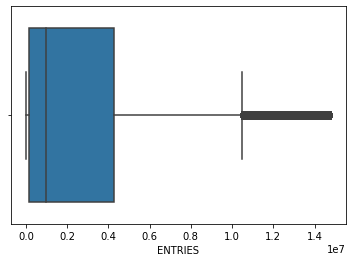

In [ ]:
sns.boxplot( turnstiles_df[turnstiles_df.ENTRIES<=outlier].ENTRIES)

/Users/yazeed/miniforge3/envs/MLenva/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/yazeed/miniforge3/envs/MLenva/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'cumulative probability distribution of entries'}, xlabel='ENTRIES', ylabel='Density'>

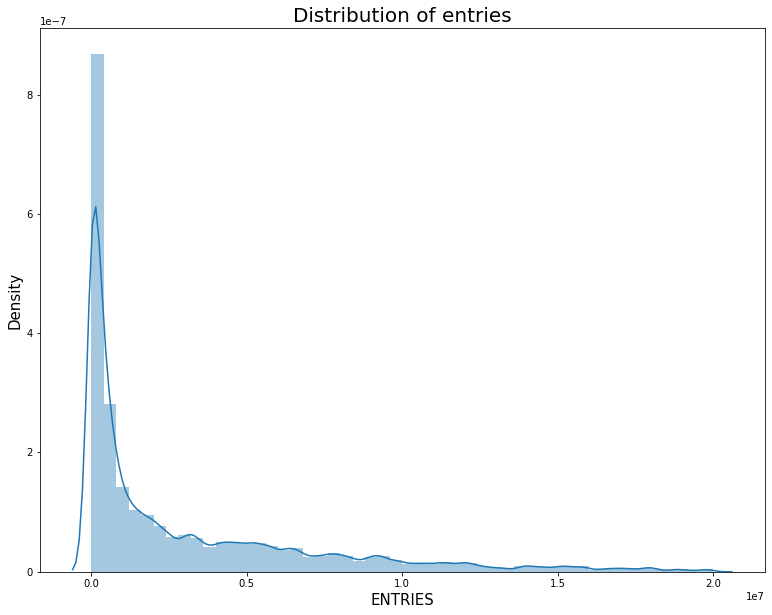

<Figure size 432x288 with 0 Axes>

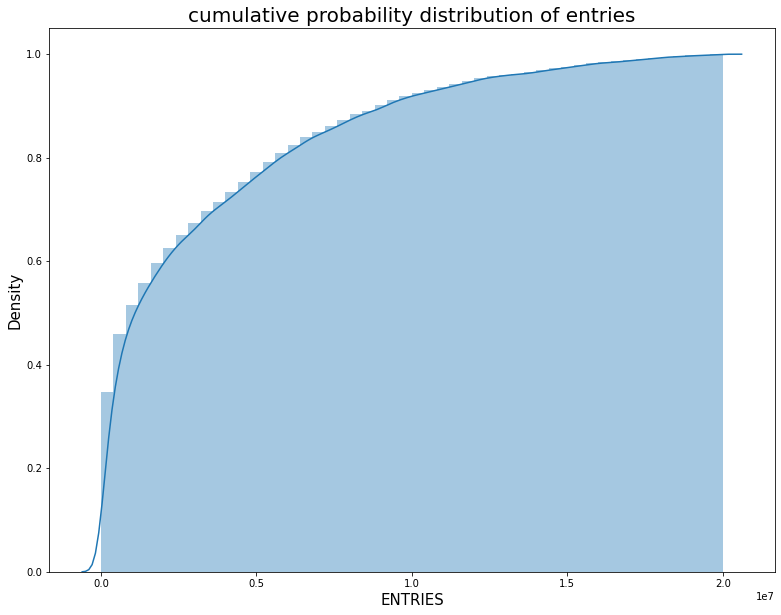

In [ ]:
#check the distribution of records for entries

plt.figure(figsize=(13,10))
plt.title("Distribution of entries", fontsize=20);
plt.xlabel("Entries", fontsize=15)
plt.ylabel("Density", fontsize=15)
sns.distplot( turnstiles_df.ENTRIES[turnstiles_df.ENTRIES<=1e7*2])
plt.figure()

plt.figure(figsize=(13,10))
plt.title("cumulative probability distribution of entries", fontsize=20);
plt.xlabel("Entries", fontsize=15)
plt.ylabel("Density", fontsize=15)
sns.distplot( turnstiles_df.ENTRIES[turnstiles_df.ENTRIES<=1e7*2],hist_kws={"cumulative":True},kde_kws={"cumulative":True})


In [ ]:
print("Number of rows before removing outliers: ",turnstiles_df.ENTRIES.count())

Number of rows before removing outliers:  3767951


In [ ]:
print("Number of rows before removing outliers: ",turnstiles_df[ (turnstiles_df.ENTRIES<=1e7*2)].ENTRIES.count())

Number of rows before removing outliers:  3487818


In [ ]:
turnstiles_df = turnstiles_df[ (turnstiles_df.ENTRIES<=1e7*2)] #remove outliers

In [ ]:
turnstiles_df.head()

,STATION,TURNSTILE ID,DATE_TIME,ENTRIES,EXITS
0,1 AV,1 AV R248 H007 00-00-00,2021-04-24 00:00:00,15554607,17751328
1,1 AV,1 AV R248 H007 00-00-00,2021-04-24 04:00:00,15554617,17751380
2,1 AV,1 AV R248 H007 00-00-00,2021-04-24 08:00:00,15554624,17751548
3,1 AV,1 AV R248 H007 00-00-00,2021-04-24 12:00:00,15554671,17751901
4,1 AV,1 AV R248 H007 00-00-00,2021-04-24 16:00:00,15554767,17752536


In [ ]:
#similar to finding outliers
q3 = turnstiles_df.EXITS.quantile(q=0.75)
q1 = turnstiles_df.EXITS.quantile(q=0.25)
IQR = q3 -  q1
outlier = q3 + 1.5 * IQR
outlier

7696556.375

In [ ]:
turnstiles_df = turnstiles_df[ (turnstiles_df.EXITS<=1e7)] #remove outliers

In [ ]:
turnstiles_df

,STATION,TURNSTILE ID,DATE_TIME,ENTRIES,EXITS
2315,1 AV,1 AV R248 H007 00-03-01,2021-04-24 00:00:00,2619815,1148706
2316,1 AV,1 AV R248 H007 00-03-01,2021-04-24 04:00:00,2619817,1148711
2317,1 AV,1 AV R248 H007 00-03-01,2021-04-24 08:00:00,2619821,1148713
2318,1 AV,1 AV R248 H007 00-03-01,2021-04-24 12:00:00,2619832,1148729
2319,1 AV,1 AV R248 H007 00-03-01,2021-04-24 16:00:00,2619848,1148758
...,...,...,...,...,...
3767946,ZEREGA AV,ZEREGA AV R326 R419 00-05-01,2021-08-27 05:00:00,39,182
3767947,ZEREGA AV,ZEREGA AV R326 R419 00-05-01,2021-08-27 09:00:00,39,182
3767948,ZEREGA AV,ZEREGA AV R326 R419 00-05-01,2021-08-27 13:00:00,39,182
3767949,ZEREGA AV,ZEREGA AV R326 R419 00-05-01,2021-08-27 17:00:00,39,182


In [ ]:
turnstiles_df = turnstiles_df.sort_values(by="ENTRIES", ascending=False)

In [ ]:
turnstiles_df.head()

,STATION,TURNSTILE ID,DATE_TIME,ENTRIES,EXITS
1006023,57 ST-7 AV,57 ST-7 AV R080 A010 00-00-06,2021-08-11 12:00:00,19999806,5564959
1006022,57 ST-7 AV,57 ST-7 AV R080 A010 00-00-06,2021-08-11 08:00:00,19999690,5564830
1006021,57 ST-7 AV,57 ST-7 AV R080 A010 00-00-06,2021-08-11 04:00:00,19999655,5564758
1006020,57 ST-7 AV,57 ST-7 AV R080 A010 00-00-06,2021-08-11 00:00:00,19999641,5564752
1006019,57 ST-7 AV,57 ST-7 AV R080 A010 00-00-06,2021-08-10 20:00:00,19999501,5564723


In [ ]:
turnstiles_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3282506 entries, 1006023 to 1548416
Data columns (total 5 columns):
 #   Column        Dtype         
---  ------        -----         
 0   STATION       object        
 1   TURNSTILE ID  object        
 2   DATE_TIME     datetime64[ns]
 3   ENTRIES       int64         
 4   EXITS         int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 150.3+ MB


# Daily entries

In [ ]:
#create two new columns that are the previous day with associated number of entries and number of exits
turnstiles_df[['Previous_time', 'Previous_Entries','Previous_EXITS']] = (turnstiles_df.groupby(['TURNSTILE ID'])["DATE_TIME", "ENTRIES", "EXITS"].apply(lambda grp: grp.shift(1)))

/var/folders/0r/78x4fk3n76q1x_swj64_76f40000gn/T/ipykernel_4145/3238453213.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  turnstiles_df[['Previous_time', 'Previous_Entries','Previous_EXITS']] = (turnstiles_df.groupby(['TURNSTILE ID'])["DATE_TIME", "ENTRIES", "EXITS"].apply(lambda grp: grp.shift(1)))


In [ ]:
turnstiles_df.head()

,STATION,TURNSTILE ID,DATE_TIME,ENTRIES,EXITS,Previous_time,Previous_Entries,Previous_EXITS
1006023,57 ST-7 AV,57 ST-7 AV R080 A010 00-00-06,2021-08-11 12:00:00,19999806,5564959,NaT,NaN,NaN
1006022,57 ST-7 AV,57 ST-7 AV R080 A010 00-00-06,2021-08-11 08:00:00,19999690,5564830,2021-08-11 12:00:00,19999806,5564959
1006021,57 ST-7 AV,57 ST-7 AV R080 A010 00-00-06,2021-08-11 04:00:00,19999655,5564758,2021-08-11 08:00:00,19999690,5564830
1006020,57 ST-7 AV,57 ST-7 AV R080 A010 00-00-06,2021-08-11 00:00:00,19999641,5564752,2021-08-11 04:00:00,19999655,5564758
1006019,57 ST-7 AV,57 ST-7 AV R080 A010 00-00-06,2021-08-10 20:00:00,19999501,5564723,2021-08-11 00:00:00,19999641,5564752


In [ ]:
#drop the first row associated with each new station in order to 
# not combine data for different turnstiles
turnstiles_df.dropna(subset = ['Previous_time'], axis = 0, inplace = True)
turnstiles_df.head()

,STATION,TURNSTILE ID,DATE_TIME,ENTRIES,EXITS,Previous_time,Previous_Entries,Previous_EXITS
1006022,57 ST-7 AV,57 ST-7 AV R080 A010 00-00-06,2021-08-11 08:00:00,19999690,5564830,2021-08-11 12:00:00,19999806,5564959
1006021,57 ST-7 AV,57 ST-7 AV R080 A010 00-00-06,2021-08-11 04:00:00,19999655,5564758,2021-08-11 08:00:00,19999690,5564830
1006020,57 ST-7 AV,57 ST-7 AV R080 A010 00-00-06,2021-08-11 00:00:00,19999641,5564752,2021-08-11 04:00:00,19999655,5564758
1006019,57 ST-7 AV,57 ST-7 AV R080 A010 00-00-06,2021-08-10 20:00:00,19999501,5564723,2021-08-11 00:00:00,19999641,5564752
1006018,57 ST-7 AV,57 ST-7 AV R080 A010 00-00-06,2021-08-10 16:00:00,19999086,5564633,2021-08-10 20:00:00,19999501,5564723


In [ ]:
turnstiles_df = turnstiles_df.groupby(["STATION","TURNSTILE ID","DATE_TIME"]).mean()

In [ ]:
turnstiles_df

ENTRIES   EXITS  \
STATION   TURNSTILE ID                 DATE_TIME                              
1 AV      1 AV R248 H007 00-03-01      2021-04-24 00:00:00  2619815 1148706   
                                       2021-04-24 04:00:00  2619817 1148711   
                                       2021-04-24 08:00:00  2619821 1148713   
                                       2021-04-24 12:00:00  2619832 1148729   
                                       2021-04-24 16:00:00  2619848 1148758   
...                                                             ...     ...   
ZEREGA AV ZEREGA AV R326 R419 00-05-01 2021-08-27 05:00:00       39     182   
                                       2021-08-27 09:00:00       39     182   
                                       2021-08-27 13:00:00       39     182   
                                       2021-08-27 17:00:00       39     182   
                                       2021-08-27 21:00:00       39     182   

                                                            Previous_Entries  \
STATION   TURNSTILE ID                 DATE_TIME                               
1 AV      1 AV R248 H007 00-03-01      2021-04-24 00:00:00           2619817   
                                       2021-04-24 04:00:00           2619821   
                                       2021-04-24 08:00:00           2619832   
                                       2021-04-24 12:00:00           2619848   
                                       2021-04-24 16:00:00           2619865   
...                                                                      ...   
ZEREGA AV ZEREGA AV R326 R419 00-05-01 2021-08-27 05:00:00                39   
                                       2021-08-27 09:00:00                39   
                                       2021-08-27 13:00:00                39   
                                       2021-08-27 17:00:00                39   
                                       2021-08-27 21:00:00                39   

                                                            Previous_EXITS  
STATION   TURNSTILE ID                 DATE_TIME                            
1 AV      1 AV R248 H007 00-03-01      2021-04-24 00:00:00         1148711  
                                       2021-04-24 04:00:00         1148713  
                                       2021-04-24 08:00:00         1148729  
                                       2021-04-24 12:00:00         1148758  
                                       2021-04-24 16:00:00         1148818  
...                                                                    ...  
ZEREGA AV ZEREGA AV R326 R419 00-05-01 2021-08-27 05:00:00             182  
                                       2021-08-27 09:00:00             182  
                                       2021-08-27 13:00:00             182  
                                       2021-08-27 17:00:00             179  
                                       2021-08-27 21:00:00             179  

[3278102 rows x 4 columns]

In [ ]:
turnstiles_df[ ((turnstiles_df.ENTRIES - turnstiles_df.Previous_Entries) < 0)] #checking if there negitive will be produced

ENTRIES   EXITS  \
STATION   TURNSTILE ID                 DATE_TIME                              
1 AV      1 AV R248 H007 00-03-01      2021-04-24 00:00:00  2619815 1148706   
                                       2021-04-24 04:00:00  2619817 1148711   
                                       2021-04-24 08:00:00  2619821 1148713   
                                       2021-04-24 12:00:00  2619832 1148729   
                                       2021-04-24 16:00:00  2619848 1148758   
...                                                             ...     ...   
ZEREGA AV ZEREGA AV R326 R419 00-03-01 2021-08-27 13:00:00  1294452  253632   
                                       2021-08-27 17:00:00  1294554  253649   
          ZEREGA AV R326 R419 00-05-00 2021-05-18 21:00:00      235       0   
                                       2021-06-02 21:00:00      236       0   
                                       2021-06-25 01:00:00      237       0   

                                                            Previous_Entries  \
STATION   TURNSTILE ID                 DATE_TIME                               
1 AV      1 AV R248 H007 00-03-01      2021-04-24 00:00:00           2619817   
                                       2021-04-24 04:00:00           2619821   
                                       2021-04-24 08:00:00           2619832   
                                       2021-04-24 12:00:00           2619848   
                                       2021-04-24 16:00:00           2619865   
...                                                                      ...   
ZEREGA AV ZEREGA AV R326 R419 00-03-01 2021-08-27 13:00:00           1294554   
                                       2021-08-27 17:00:00           1294613   
          ZEREGA AV R326 R419 00-05-00 2021-05-18 21:00:00               236   
                                       2021-06-02 21:00:00               237   
                                       2021-06-25 01:00:00               238   

                                                            Previous_EXITS  
STATION   TURNSTILE ID                 DATE_TIME                            
1 AV      1 AV R248 H007 00-03-01      2021-04-24 00:00:00         1148711  
                                       2021-04-24 04:00:00         1148713  
                                       2021-04-24 08:00:00         1148729  
                                       2021-04-24 12:00:00         1148758  
                                       2021-04-24 16:00:00         1148818  
...                                                                    ...  
ZEREGA AV ZEREGA AV R326 R419 00-03-01 2021-08-27 13:00:00          253649  
                                       2021-08-27 17:00:00          253682  
          ZEREGA AV R326 R419 00-05-00 2021-05-18 21:00:00               0  
                                       2021-06-02 21:00:00               0  
                                       2021-06-25 01:00:00               0  

[2707066 rows x 4 columns]

In [ ]:
#check, is the count actually increasing each day ?
# i.e., we should have count(yesterday) < count(today)
# but it looks like that's not the case

counter_mask = (turnstiles_df['ENTRIES'] < turnstiles_df['Previous_Entries']) 
turnstiles_df[counter_mask].head(50)

ENTRIES   EXITS  \
STATION TURNSTILE ID            DATE_TIME                              
1 AV    1 AV R248 H007 00-03-01 2021-04-24 00:00:00  2619815 1148706   
                                2021-04-24 04:00:00  2619817 1148711   
                                2021-04-24 08:00:00  2619821 1148713   
                                2021-04-24 12:00:00  2619832 1148729   
                                2021-04-24 16:00:00  2619848 1148758   
                                2021-04-24 20:00:00  2619865 1148818   
                                2021-04-25 00:00:00  2619876 1148844   
                                2021-04-25 04:00:00  2619878 1148847   
                                2021-04-25 08:00:00  2619879 1148851   
                                2021-04-25 12:00:00  2619885 1148862   
                                2021-04-25 16:00:00  2619894 1148890   
                                2021-04-25 20:00:00  2619904 1148909   
                                2021-04-26 00:00:00  2619906 1148916   
                                2021-04-26 04:00:00  2619907 1148917   
                                2021-04-26 08:00:00  2619908 1148946   
                                2021-04-26 12:00:00  2619922 1148964   
                                2021-04-26 16:00:00  2619934 1148991   
                                2021-04-26 20:00:00  2619947 1149012   
                                2021-04-27 04:00:00  2619952 1149022   
                                2021-04-27 08:00:00  2619957 1149044   
                                2021-04-27 12:00:00  2619974 1149077   
                                2021-04-27 16:00:00  2619990 1149094   
                                2021-04-27 20:00:00  2620003 1149122   
                                2021-04-28 04:00:00  2620010 1149136   
                                2021-04-28 08:00:00  2620016 1149161   
                                2021-04-28 12:00:00  2620031 1149196   
                                2021-04-28 16:00:00  2620048 1149223   
                                2021-04-28 20:00:00  2620066 1149245   
                                2021-04-29 04:00:00  2620069 1149259   
                                2021-04-29 08:00:00  2620071 1149276   
                                2021-04-29 12:00:00  2620078 1149303   
                                2021-04-29 16:00:00  2620101 1149330   
                                2021-04-29 20:00:00  2620122 1149345   
                                2021-04-30 00:00:00  2620127 1149357   
                                2021-04-30 04:00:00  2620128 1149357   
                                2021-04-30 08:00:00  2620131 1149376   
                                2021-04-30 12:00:00  2620147 1149400   
                                2021-04-30 16:00:00  2620163 1149425   
                                2021-04-30 20:00:00  2620179 1149449   
                                2021-05-01 00:00:00  2620187 1149465   
                                2021-05-01 04:00:00  2620189 1149475   
                                2021-05-01 08:00:00  2620191 1149478   
                                2021-05-01 12:00:00  2620206 1149503   
                                2021-05-01 16:00:00  2620223 1149536   
                                2021-05-01 20:00:00  2620242 1149588   
                                2021-05-02 00:00:00  2620255 1149619   
                                2021-05-02 04:00:00  2620258 1149624   
                                2021-05-02 08:00:00  2620259 1149626   
                                2021-05-02 12:00:00  2620262 1149636   
                                2021-05-02 16:00:00  2620273 1149669   

                                                     Previous_Entries  \
STATION TURNSTILE ID            DATE_TIME                               
1 AV    1 AV R248 H007 00-03-01 2021-04-24 00:00:00           2619817   
                                2021-04-24 04:00:00           2619821   
                

In [ ]:
#how many tursntiles have this issue?
turnstiles_df[counter_mask].groupby(['TURNSTILE ID']).size()

TURNSTILE ID
1 AV R248 H007 00-03-01         722
1 AV R248 H007 00-03-02         764
1 AV R248 H007A 02-00-00        765
1 AV R248 H007A 02-00-01        638
1 AV R248 H007A 02-00-02        766
                               ... 
ZEREGA AV R326 R419 00-00-00    740
ZEREGA AV R326 R419 00-00-01    717
ZEREGA AV R326 R419 00-03-00    739
ZEREGA AV R326 R419 00-03-01    747
ZEREGA AV R326 R419 00-05-00      3
Length: 4175, dtype: int64

In [ ]:
turnstiles_df = turnstiles_df.reset_index()
turnstiles_df

,STATION,TURNSTILE ID,DATE_TIME,ENTRIES,EXITS,Previous_Entries,Previous_EXITS
0,1 AV,1 AV R248 H007 00-03-01,2021-04-24 00:00:00,2619815,1148706,2619817,1148711
1,1 AV,1 AV R248 H007 00-03-01,2021-04-24 04:00:00,2619817,1148711,2619821,1148713
2,1 AV,1 AV R248 H007 00-03-01,2021-04-24 08:00:00,2619821,1148713,2619832,1148729
3,1 AV,1 AV R248 H007 00-03-01,2021-04-24 12:00:00,2619832,1148729,2619848,1148758
4,1 AV,1 AV R248 H007 00-03-01,2021-04-24 16:00:00,2619848,1148758,2619865,1148818
...,...,...,...,...,...,...,...
3278097,ZEREGA AV,ZEREGA AV R326 R419 00-05-01,2021-08-27 05:00:00,39,182,39,182
3278098,ZEREGA AV,ZEREGA AV R326 R419 00-05-01,2021-08-27 09:00:00,39,182,39,182
3278099,ZEREGA AV,ZEREGA AV R326 R419 00-05-01,2021-08-27 13:00:00,39,182,39,182
3278100,ZEREGA AV,ZEREGA AV R326 R419 00-05-01,2021-08-27 17:00:00,39,182,39,179


In [ ]:
#Function to get the daily entries
def hourly_count(row, max_count):
    count = row['ENTRIES'] - row['Previous_Entries']
    
    if count < 0:
        count *= -1
    if count > max_count:
        count = min(row["ENTRIES"], row["Previous_Entries"])
    if count > max_count:
      #overshotting case
        return 0
    
    return count

turnstiles_df['Hourly_Entries'] =  turnstiles_df.apply(hourly_count, axis=1, max_count=900)


In [ ]:
#Function to get the daily entries


def hourly_count(row, max_count):
    count = row['EXITS'] - row['Previous_EXITS']
    
    if count < 0:
        count *= -1
        
    if count > max_count:
        count = min(row["EXITS"], row["Previous_EXITS"])
    if count > max_count:
      #overshotting case
        return 0
    return count

turnstiles_df['Hourly_EXITS'] =  turnstiles_df.apply(hourly_count, axis=1, max_count=900)


In [ ]:
turnstiles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3278102 entries, 0 to 3278101
Data columns (total 9 columns):
 #   Column            Dtype         
---  ------            -----         
 0   STATION           object        
 1   TURNSTILE ID      object        
 2   DATE_TIME         datetime64[ns]
 3   ENTRIES           float64       
 4   EXITS             float64       
 5   Previous_Entries  float64       
 6   Previous_EXITS    float64       
 7   Hourly_Entries    float64       
 8   Hourly_EXITS      float64       
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 225.1+ MB


In [ ]:
print("Is there nulls in entries?: " , sum(turnstiles_df.isna().Hourly_Entries))
print("Is there nulls in entries?: " , sum(turnstiles_df.isna().Hourly_EXITS))

Is there nulls in entries?:  0
Is there nulls in entries?:  0


In [ ]:
turnstiles_df = turnstiles_df.sort_values(by = "Hourly_Entries", ascending=False)

In [ ]:
turnstiles_df

,STATION,TURNSTILE ID,DATE_TIME,ENTRIES,EXITS,Previous_Entries,Previous_EXITS,Hourly_Entries,Hourly_EXITS
2382096,JOURNAL SQUARE,JOURNAL SQUARE R552 PTH03 00-00-07,2021-05-04 06:11:42,407376,108528,408275,108543,899,15
2144926,GRD CNTRL-42 ST,GRD CNTRL-42 ST R046 R238 00-06-01,2021-08-03 16:00:00,424125,287219,425024,287556,899,337
885603,59 ST COLUMBUS,59 ST COLUMBUS R084 N051 02-00-00,2021-06-15 16:00:00,15825569,2296354,15826468,2296513,899,159
2775064,PARKCHESTER,PARKCHESTER R222 R417 00-00-00,2021-06-08 05:00:00,11934360,703254,11935259,703269,899,15
25279,103 ST-CORONA,103 ST-CORONA R208 R529 00-00-03,2021-05-14 04:00:00,2159469,810589,2160368,810601,899,12
...,...,...,...,...,...,...,...,...,...
1695322,CITY HALL,CITY HALL R087 A047 00-03-01,2021-05-19 00:00:00,875543,200133,875543,200134,0,1
1695316,CITY HALL,CITY HALL R087 A047 00-03-01,2021-05-18 00:00:00,875384,200090,875384,200091,0,1
1695311,CITY HALL,CITY HALL R087 A047 00-03-01,2021-05-17 04:00:00,875248,200059,875248,200059,0,0
1695293,CITY HALL,CITY HALL R087 A047 00-03-01,2021-05-14 04:00:00,874923,199987,874923,199987,0,0


> Unhandeld case: for no reason overshooting
we were analysis different dates for same behavior.

In [ ]:
mask1 = (turnstiles_df.DATE_TIME.dt.day == 14) & (turnstiles_df.DATE_TIME.dt.month == 5) & (turnstiles_df["TURNSTILE ID"] == "103 ST-CORONA R208 R529 00-00-03")

In [ ]:
mask2 = (turnstiles_df.DATE_TIME.dt.day == 13) & (turnstiles_df.DATE_TIME.dt.month == 5) & (turnstiles_df["TURNSTILE ID"] == "103 ST-CORONA R208 R529 00-00-03")

In [ ]:
turnstiles_df[mask1].head(10)

,STATION,TURNSTILE ID,DATE_TIME,ENTRIES,EXITS,Previous_Entries,Previous_EXITS,Hourly_Entries,Hourly_EXITS
25279,103 ST-CORONA,103 ST-CORONA R208 R529 00-00-03,2021-05-14 04:00:00,2159469,810589,2160368,810601,899,12
25280,103 ST-CORONA,103 ST-CORONA R208 R529 00-00-03,2021-05-14 08:00:00,2160368,810601,2160747,810648,379,47
25281,103 ST-CORONA,103 ST-CORONA R208 R529 00-00-03,2021-05-14 12:00:00,2160747,810648,2161034,810751,287,103
25282,103 ST-CORONA,103 ST-CORONA R208 R529 00-00-03,2021-05-14 16:00:00,2161034,810751,2161225,810976,191,225
25283,103 ST-CORONA,103 ST-CORONA R208 R529 00-00-03,2021-05-14 20:00:00,2161225,810976,2161297,811087,72,111
25278,103 ST-CORONA,103 ST-CORONA R208 R529 00-00-03,2021-05-14 00:00:00,2159467,810563,2159469,810589,2,26


In [ ]:
turnstiles_df[mask2].head(10)

,STATION,TURNSTILE ID,DATE_TIME,ENTRIES,EXITS,Previous_Entries,Previous_EXITS,Hourly_Entries,Hourly_EXITS
25273,103 ST-CORONA,103 ST-CORONA R208 R529 00-00-03,2021-05-13 04:00:00,2158323,810052,2158753,810065,430,13
25274,103 ST-CORONA,103 ST-CORONA R208 R529 00-00-03,2021-05-13 08:00:00,2158753,810065,2159066,810128,313,63
25275,103 ST-CORONA,103 ST-CORONA R208 R529 00-00-03,2021-05-13 12:00:00,2159066,810128,2159271,810235,205,107
25276,103 ST-CORONA,103 ST-CORONA R208 R529 00-00-03,2021-05-13 16:00:00,2159271,810235,2159416,810474,145,239
25277,103 ST-CORONA,103 ST-CORONA R208 R529 00-00-03,2021-05-13 20:00:00,2159416,810474,2159467,810563,51,89
25272,103 ST-CORONA,103 ST-CORONA R208 R529 00-00-03,2021-05-13 00:00:00,2158320,810033,2158323,810052,3,19


In [ ]:
turnstiles_df.Hourly_Entries.describe()

count   3278102
mean         56
std          81
min           0
25%           3
50%          24
75%          77
max         899
Name: Hourly_Entries, dtype: float64

In [ ]:
turnstiles_df.Hourly_EXITS.describe()

count   3278116
mean         61
std          92
min           0
25%           5
50%          27
75%          79
max         900
Name: Hourly_EXITS, dtype: float64

--------------------------------------------------------------------------------------------------

# Visualization

/Users/yazeed/miniforge3/envs/MLenva/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribution of entries'}, xlabel='Hourly_Entries', ylabel='Density'>

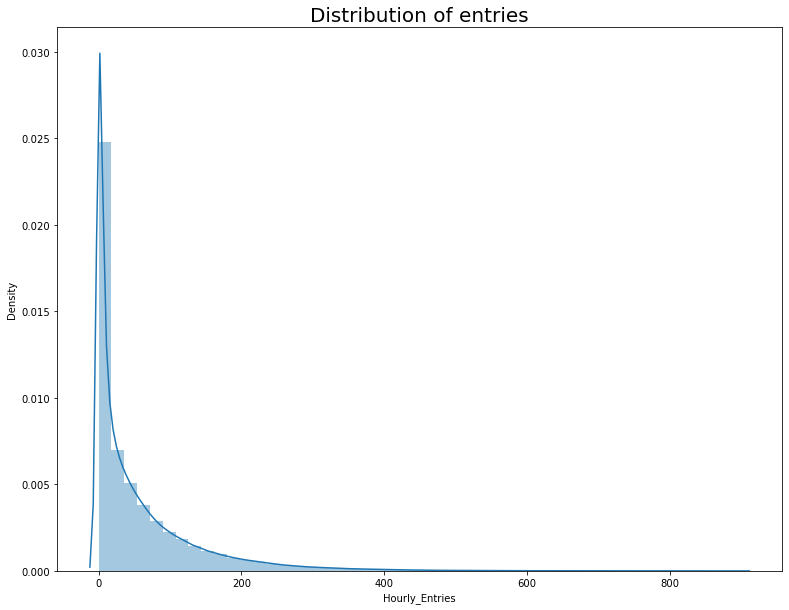

In [ ]:
#check the distribution of records of hourly entries
plt.figure(figsize=(13,10))
plt.title("Distribution of entries", fontsize=20);
plt.xlabel("Hourly_Entries", fontsize=15)
plt.ylabel("Density", fontsize=15)
sns.distplot(turnstiles_df['Hourly_Entries'])

/Users/yazeed/miniforge3/envs/MLenva/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribution of exits'}, xlabel='Hourly_EXITS', ylabel='Density'>

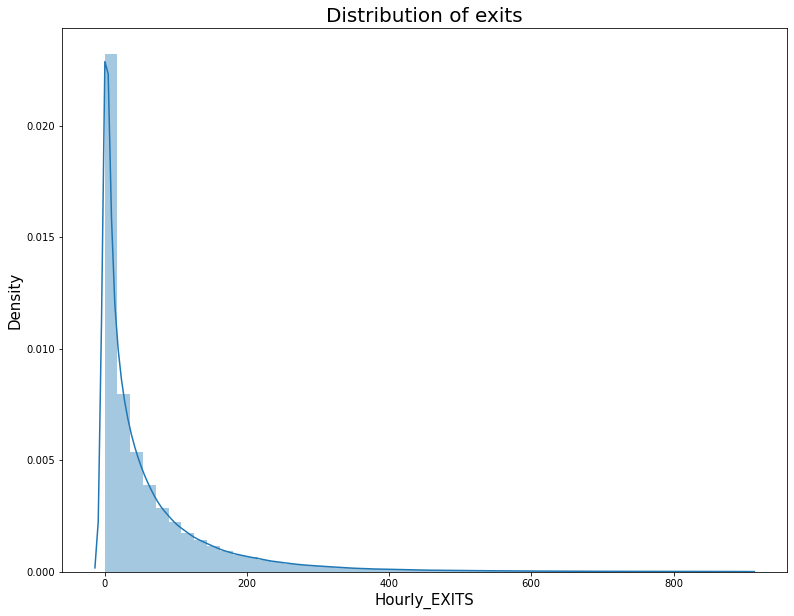

In [ ]:
#check the distribution of records of hourly exits
plt.figure(figsize=(13,10))
plt.title("Distribution of exits", fontsize=20);
plt.xlabel("Hourly_EXITS", fontsize=15)
plt.ylabel("Density", fontsize=15)
sns.distplot(turnstiles_df['Hourly_EXITS'])

## Entries/exits on monthly bases

In [ ]:
#Max date of a number of entries
print('Max date of a number of entries: ', turnstiles_df.groupby([turnstiles_df['DATE_TIME'].dt.date])['Hourly_Entries'].sum().max())

Max date of a number of entries:  1831407.0


In [ ]:
turnstiles_df

,STATION,TURNSTILE ID,DATE_TIME,ENTRIES,EXITS,Previous_Entries,Previous_EXITS,Hourly_Entries,Hourly_EXITS
25279,103 ST-CORONA,103 ST-CORONA R208 R529 00-00-03,2021-05-14 04:00:00,2159469,810589,2160368,810601,899,12
2382107,JOURNAL SQUARE,JOURNAL SQUARE R552 PTH03 00-00-07,2021-05-04 06:11:42,407376,108528,408275,108543,899,15
2145832,GRD CNTRL-42 ST,GRD CNTRL-42 ST R046 R238 00-06-02,2021-08-26 16:00:00,692063,581046,692962,581508,899,462
2775075,PARKCHESTER,PARKCHESTER R222 R417 00-00-00,2021-06-08 05:00:00,11934360,703254,11935259,703269,899,15
885614,59 ST COLUMBUS,59 ST COLUMBUS R084 N051 02-00-00,2021-06-15 16:00:00,15825569,2296354,15826468,2296513,899,159
...,...,...,...,...,...,...,...,...,...
1695376,CITY HALL,CITY HALL R087 A047 00-03-01,2021-05-26 04:00:00,876436,200347,876436,200347,0,0
1695369,CITY HALL,CITY HALL R087 A047 00-03-01,2021-05-25 00:00:00,876271,200311,876271,200311,0,0
1695357,CITY HALL,CITY HALL R087 A047 00-03-01,2021-05-23 00:00:00,876082,200266,876082,200266,0,0
1695340,CITY HALL,CITY HALL R087 A047 00-03-01,2021-05-20 04:00:00,875692,200176,875692,200173,0,3


In [ ]:
#Finding top 20 stations during the four months
top20_alltime_entries  = turnstiles_df.reset_index().groupby("STATION")[["Hourly_Entries","Hourly_EXITS"]].sum().reset_index().nlargest(n=20,columns="Hourly_Entries")
top20_alltime_entries.rename(columns={"Hourly_Entries": "entries of station (4months)","Hourly_EXITS":"Monthly exits of station (4months)"}, inplace=True)
top20_alltime_entries.reset_index( inplace=True)
top20_alltime_entries.drop(columns="index" , inplace=True)


In [ ]:
top20_alltime_entries

,STATION,entries of station (4months),Monthly exits of station (4months)
0,34 ST-PENN STA,4091308,5042959
1,GRD CNTRL-42 ST,3277735,4428445
2,34 ST-HERALD SQ,3064163,3495343
3,23 ST,3016865,3464967
4,FULTON ST,2721699,3346058
5,59 ST,2536612,2705119
6,14 ST-UNION SQ,2448403,3207576
7,JKSN HT-ROOSVLT,2443236,2251527
8,86 ST,2419090,2886234
9,TIMES SQ-42 ST,2284576,3402594


/Users/yazeed/miniforge3/envs/MLenva/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


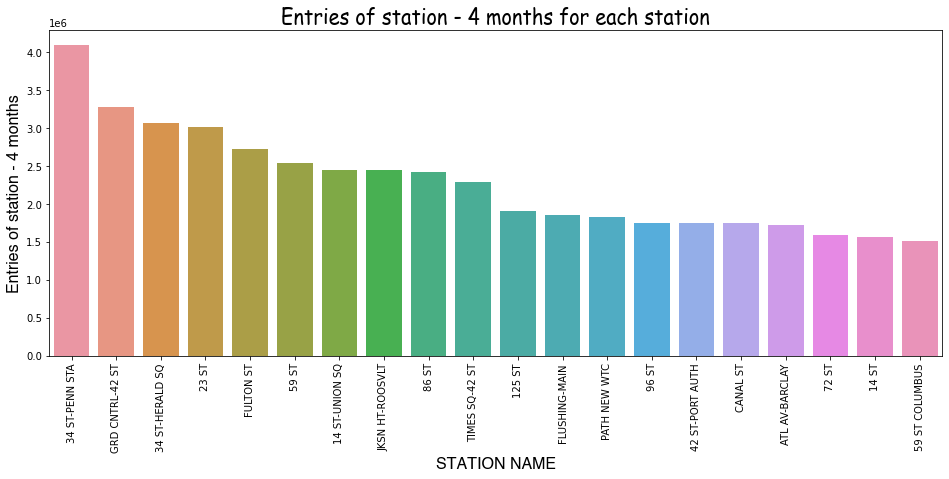

In [ ]:
plt.figure(figsize=(16, 6))
ax = sns.barplot(top20_alltime_entries.STATION, top20_alltime_entries["entries of station (4months)"]);
ax.set_title("Entries of station - 4 months for each station",fontsize=20,**csfont)
ax.set_xlabel("STATION NAME",fontsize=16,**hfont)
ax.set_ylabel("Entries of station - 4 months",fontsize=16,**hfont)
plt.xticks(rotation = 90);


/Users/yazeed/miniforge3/envs/MLenva/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


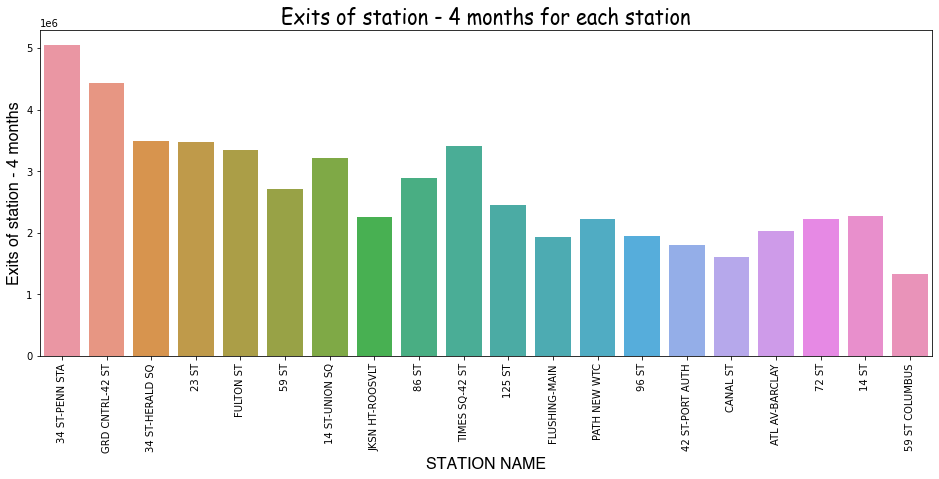

In [ ]:
plt.figure(figsize=(16, 6))
ax = sns.barplot(top20_alltime_entries.STATION, top20_alltime_entries["Monthly exits of station (4months)"]);
ax.set_title("Exits of station - 4 months for each station",fontsize=20,**csfont)
ax.set_xlabel("STATION NAME",fontsize=16,**hfont)
ax.set_ylabel("Exits of station - 4 months",fontsize=16,**hfont)
plt.xticks(rotation = 90);


## number of entries/exits in each day in one week

In [ ]:
turnstiles_df

,STATION,TURNSTILE ID,DATE_TIME,ENTRIES,EXITS,Previous_Entries,Previous_EXITS,Hourly_Entries,Hourly_EXITS
2382096,JOURNAL SQUARE,JOURNAL SQUARE R552 PTH03 00-00-07,2021-05-04 06:11:42,407376,108528,408275,108543,899,15
2144926,GRD CNTRL-42 ST,GRD CNTRL-42 ST R046 R238 00-06-01,2021-08-03 16:00:00,424125,287219,425024,287556,899,337
885603,59 ST COLUMBUS,59 ST COLUMBUS R084 N051 02-00-00,2021-06-15 16:00:00,15825569,2296354,15826468,2296513,899,159
2775064,PARKCHESTER,PARKCHESTER R222 R417 00-00-00,2021-06-08 05:00:00,11934360,703254,11935259,703269,899,15
25279,103 ST-CORONA,103 ST-CORONA R208 R529 00-00-03,2021-05-14 04:00:00,2159469,810589,2160368,810601,899,12
...,...,...,...,...,...,...,...,...,...
1695322,CITY HALL,CITY HALL R087 A047 00-03-01,2021-05-19 00:00:00,875543,200133,875543,200134,0,1
1695316,CITY HALL,CITY HALL R087 A047 00-03-01,2021-05-18 00:00:00,875384,200090,875384,200091,0,1
1695311,CITY HALL,CITY HALL R087 A047 00-03-01,2021-05-17 04:00:00,875248,200059,875248,200059,0,0
1695293,CITY HALL,CITY HALL R087 A047 00-03-01,2021-05-14 04:00:00,874923,199987,874923,199987,0,0


In [ ]:
#Check if it is in the top 20 stations
top20stations = turnstiles_df[turnstiles_df.STATION.isin(top20_alltime_entries.STATION)]
top20stations

,STATION,TURNSTILE ID,DATE_TIME,ENTRIES,EXITS,Previous_Entries,Previous_EXITS,Hourly_Entries,Hourly_EXITS
2144926,GRD CNTRL-42 ST,GRD CNTRL-42 ST R046 R238 00-06-01,2021-08-03 16:00:00,424125,287219,425024,287556,899,337
885603,59 ST COLUMBUS,59 ST COLUMBUS R084 N051 02-00-00,2021-06-15 16:00:00,15825569,2296354,15826468,2296513,899,159
885777,59 ST COLUMBUS,59 ST COLUMBUS R084 N051 02-00-00,2021-07-14 16:00:00,15885053,2314951,15885952,2315085,899,134
2145821,GRD CNTRL-42 ST,GRD CNTRL-42 ST R046 R238 00-06-02,2021-08-26 16:00:00,692063,581046,692962,581508,899,462
885651,59 ST COLUMBUS,59 ST COLUMBUS R084 N051 02-00-00,2021-06-23 16:00:00,15842499,2301688,15843396,2301879,897,191
...,...,...,...,...,...,...,...,...,...
2804163,PATH NEW WTC,PATH NEW WTC R540 PTH22 00-02-00,2021-08-09 05:17:46,39386,60085,39386,60077,0,8
2804165,PATH NEW WTC,PATH NEW WTC R540 PTH22 00-02-00,2021-08-09 13:41:46,39411,60639,53720,57050,0,0
2804157,PATH NEW WTC,PATH NEW WTC R540 PTH22 00-02-00,2021-08-08 04:05:46,39369,59710,39369,59695,0,15
2804153,PATH NEW WTC,PATH NEW WTC R540 PTH22 00-02-00,2021-08-07 11:17:46,39343,59319,39343,59183,0,136


In [ ]:
top20dayofweek = top20stations.groupby(["STATION", turnstiles_df['DATE_TIME'].dt.dayofweek])[["Hourly_Entries","Hourly_EXITS"]].sum()

In [ ]:
top20dayofweek["Hourly_Entries"] = top20dayofweek["Hourly_Entries"]/Numberofdays
top20dayofweek["Hourly_EXITS"] = top20dayofweek["Hourly_EXITS"]/Numberofdays

In [ ]:
top20dayofweek = top20dayofweek.reset_index()
top20dayofweek.rename(columns={"Hourly_Entries": "Day entries of station","Hourly_EXITS": "Day exits of station"}, inplace=True)
top20dayofweek.head()

,STATION,DATE_TIME,Day entries of station,Day exits of station
0,125 ST,0,2205,2801
1,125 ST,1,2413,3027
2,125 ST,2,2455,3076
3,125 ST,3,2465,3108
4,125 ST,4,2493,3146


In [ ]:
#Checking for random three stations of top 20 stations
STA1 = top20dayofweek[top20dayofweek.STATION=="34 ST-PENN STA"]
STA2 = top20dayofweek[top20dayofweek.STATION=="14 ST-UNION SQ"]
STA3 = top20dayofweek[top20dayofweek.STATION=="TIMES SQ-42 ST"]

In [ ]:
STA1

,STATION,DATE_TIME,Day entries of station,Day exits of station
35,34 ST-PENN STA,0,4885,5676
36,34 ST-PENN STA,1,5232,6113
37,34 ST-PENN STA,2,5297,6220
38,34 ST-PENN STA,3,5299,6301
39,34 ST-PENN STA,4,5190,6515
40,34 ST-PENN STA,5,3540,5137
41,34 ST-PENN STA,6,3028,4062


Text(0, 0.5, 'Number of entries/exits')

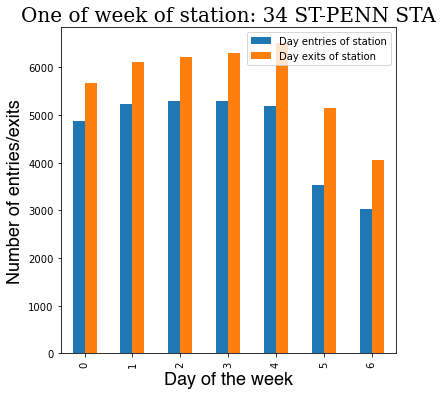

In [ ]:
df = pd.DataFrame({"Day entries of station":STA1["Day entries of station"],"Day exits of station":STA1["Day exits of station"]})
df.reset_index(inplace=True,drop=True)
csfont = {'fontname':'serif'}
hfont = {'fontname':'Helvetica'}
fig = df.plot(kind="bar", figsize=(6,6),legend=True)
fig.axes.set_title("One of week of station: 34 ST-PENN STA",fontsize=20,**csfont)
fig.axes.set_xlabel("Day of the week", fontsize=18, **hfont)
fig.axes.set_ylabel("Number of entries/exits", fontsize=18, **hfont)

Text(0, 0.5, 'Number of entries/exits')

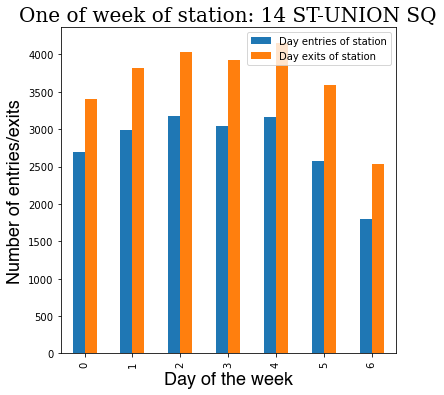

In [ ]:
df = pd.DataFrame({"Day entries of station":STA2["Day entries of station"],"Day exits of station":STA2["Day exits of station"]})
df.reset_index(inplace=True,drop=True)
csfont = {'fontname':'serif'}
hfont = {'fontname':'Helvetica'}
fig = df.plot(kind="bar", figsize=(6,6),legend=True)
fig.axes.set_title("One of week of station: 14 ST-UNION SQ",fontsize=20,**csfont)
fig.axes.set_xlabel("Day of the week", fontsize=18, **hfont)
fig.axes.set_ylabel("Number of entries/exits", fontsize=18, **hfont)

Text(0, 0.5, 'Number of entries/exits')

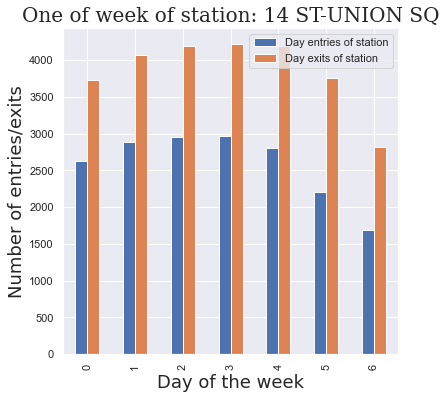

In [ ]:
df = pd.DataFrame({"Day entries of station":STA3["Day entries of station"],"Day exits of station":STA3["Day exits of station"]})
df.reset_index(inplace=True,drop=True)
csfont = {'fontname':'serif'}
hfont = {'fontname':'Helvetica'}
fig = df.plot(kind="bar", figsize=(6,6),legend=True)
fig.axes.set_title("One of week of station: 14 ST-UNION SQ",fontsize=20,**csfont)
fig.axes.set_xlabel("Day of the week", fontsize=18, **hfont)
fig.axes.set_ylabel("Number of entries/exits", fontsize=18, **hfont)

## Checking number of entries (hourly)

In [ ]:
turnstiles_df

,STATION,TURNSTILE ID,DATE_TIME,ENTRIES,EXITS,Previous_Entries,Previous_EXITS,Hourly_Entries,Hourly_EXITS
2382096,JOURNAL SQUARE,JOURNAL SQUARE R552 PTH03 00-00-07,2021-05-04 06:11:42,407376,108528,408275,108543,899,15
2144926,GRD CNTRL-42 ST,GRD CNTRL-42 ST R046 R238 00-06-01,2021-08-03 16:00:00,424125,287219,425024,287556,899,337
885603,59 ST COLUMBUS,59 ST COLUMBUS R084 N051 02-00-00,2021-06-15 16:00:00,15825569,2296354,15826468,2296513,899,159
2775064,PARKCHESTER,PARKCHESTER R222 R417 00-00-00,2021-06-08 05:00:00,11934360,703254,11935259,703269,899,15
25279,103 ST-CORONA,103 ST-CORONA R208 R529 00-00-03,2021-05-14 04:00:00,2159469,810589,2160368,810601,899,12
...,...,...,...,...,...,...,...,...,...
1695322,CITY HALL,CITY HALL R087 A047 00-03-01,2021-05-19 00:00:00,875543,200133,875543,200134,0,1
1695316,CITY HALL,CITY HALL R087 A047 00-03-01,2021-05-18 00:00:00,875384,200090,875384,200091,0,1
1695311,CITY HALL,CITY HALL R087 A047 00-03-01,2021-05-17 04:00:00,875248,200059,875248,200059,0,0
1695293,CITY HALL,CITY HALL R087 A047 00-03-01,2021-05-14 04:00:00,874923,199987,874923,199987,0,0


In [ ]:
top20stations = turnstiles_df[turnstiles_df.STATION.isin(top20_alltime_entries.STATION)]
top20hourly = top20stations.copy()
top20hourly["WEEKDAY"] = top20hourly.DATE_TIME.dt.dayofweek
top20hourly["TIME"] = top20hourly.DATE_TIME.dt.hour

In [ ]:
top20hourly = top20hourly.groupby(["STATION",top20hourly.DATE_TIME.dt.week, "WEEKDAY", "TIME"])[["Hourly_Entries","Hourly_EXITS"]].mean()
top20hourly

/var/folders/0r/78x4fk3n76q1x_swj64_76f40000gn/T/ipykernel_4145/1659989312.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  top20hourly = top20hourly.groupby(["STATION",top20hourly.DATE_TIME.dt.week, "WEEKDAY", "TIME"])[["Hourly_Entries","Hourly_EXITS"]].mean()


Hourly_Entries  Hourly_EXITS
STATION        DATE_TIME WEEKDAY TIME                              
125 ST         16        5       0                  6            25
                                 1                  5            16
                                 4                 31            39
                                 5                 59            89
                                 8                 91           108
...                                               ...           ...
TIMES SQ-42 ST 34        4       4                 43            83
                                 8                111           171
                                 12               177           216
                                 16               220           228
                                 20                 0             0

[26523 rows x 2 columns]

In [ ]:
top20hourly.reset_index(inplace=True)
top20hourly

,STATION,DATE_TIME,WEEKDAY,TIME,Hourly_Entries,Hourly_EXITS
0,125 ST,16,5,0,6,25
1,125 ST,16,5,1,5,16
2,125 ST,16,5,4,31,39
3,125 ST,16,5,5,59,89
4,125 ST,16,5,8,91,108
...,...,...,...,...,...,...
26518,TIMES SQ-42 ST,34,4,4,43,83
26519,TIMES SQ-42 ST,34,4,8,111,171
26520,TIMES SQ-42 ST,34,4,12,177,216
26521,TIMES SQ-42 ST,34,4,16,220,228


In [ ]:
top20hourly.rename(columns={"DATE_TIME":"WeekNumber"}, inplace=True)
top20hourly

,STATION,WeekNumber,WEEKDAY,TIME,Hourly_Entries,Hourly_EXITS
0,125 ST,16,5,0,6,25
1,125 ST,16,5,1,5,16
2,125 ST,16,5,4,31,39
3,125 ST,16,5,5,59,89
4,125 ST,16,5,8,91,108
...,...,...,...,...,...,...
26518,TIMES SQ-42 ST,34,4,4,43,83
26519,TIMES SQ-42 ST,34,4,8,111,171
26520,TIMES SQ-42 ST,34,4,12,177,216
26521,TIMES SQ-42 ST,34,4,16,220,228


In [ ]:
#Picking a random station of top 20 stations and checking for weekdays
STA1 = top20hourly[(top20hourly.STATION=="34 ST-PENN STA") &  (top20hourly.WEEKDAY<= 4) ]
STA2 = top20hourly[(top20hourly.STATION=="14 ST-UNION SQ") &  (top20hourly.WEEKDAY<= 4) ]
STA3 = top20hourly[(top20hourly.STATION=="TIMES SQ-42 ST") &  (top20hourly.WEEKDAY<= 4) ]

In [ ]:
STA1

,STATION,WeekNumber,WEEKDAY,TIME,Hourly_Entries,Hourly_EXITS
6079,34 ST-PENN STA,17,0,0,6,9
6080,34 ST-PENN STA,17,0,2,15,18
6081,34 ST-PENN STA,17,0,4,48,48
6082,34 ST-PENN STA,17,0,6,169,141
6083,34 ST-PENN STA,17,0,8,65,86
...,...,...,...,...,...,...
7576,34 ST-PENN STA,34,4,14,166,233
7577,34 ST-PENN STA,34,4,16,122,156
7578,34 ST-PENN STA,34,4,18,105,132
7579,34 ST-PENN STA,34,4,20,7,67


/Users/yazeed/miniforge3/envs/MLenva/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/yazeed/miniforge3/envs/MLenva/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/yazeed/miniforge3/envs/MLenva/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an e

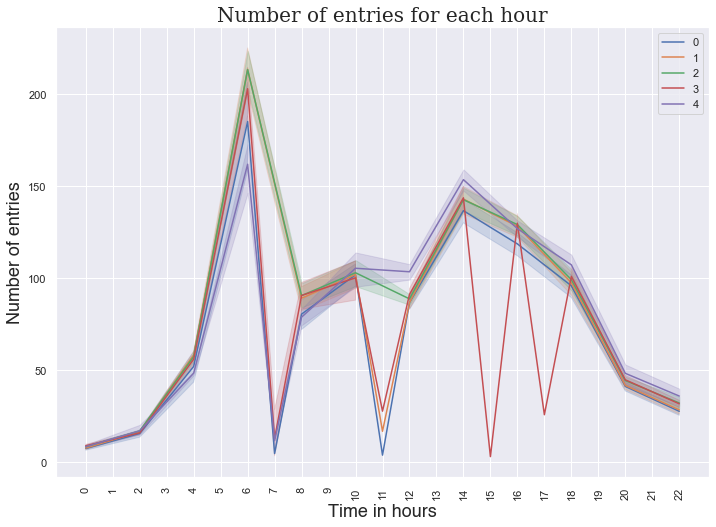

In [ ]:
fig, ax = plt.subplots()
for day in range(0,7):
  sns.lineplot(STA1[STA1.WEEKDAY==day].TIME, STA1[STA1.WEEKDAY==day].Hourly_Entries, ax=ax, label=day);
  sns.set(rc={'figure.figsize':(11.7,8.27)})
  ax.set_title("Number of entries for each hour",fontsize=20,**csfont)
  ax.set_xlabel("Time in hours", fontsize=18, **hfont)
  ax.set_ylabel("Number of entries", fontsize=18, **hfont)
  ax.set_xticks(range(0,23));
plt.xticks(rotation = 90);

/Users/yazeed/miniforge3/envs/MLenva/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/yazeed/miniforge3/envs/MLenva/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/yazeed/miniforge3/envs/MLenva/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an e

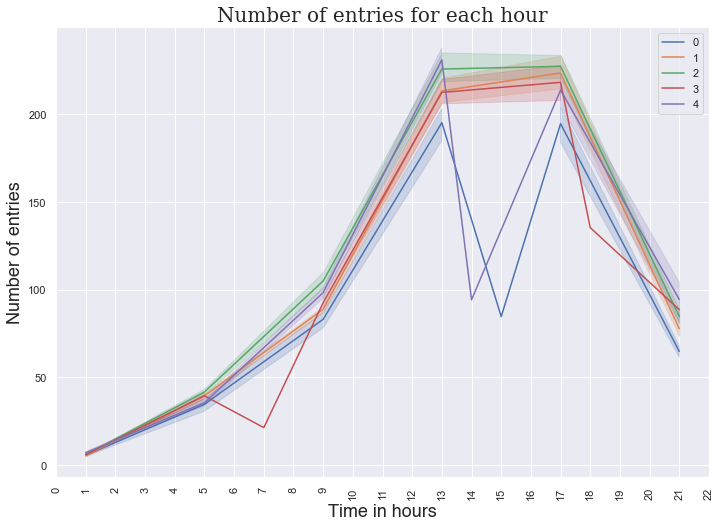

In [ ]:
fig, ax = plt.subplots()
for day in range(0,7):
  sns.lineplot(STA2[STA2.WEEKDAY==day].TIME, STA2[STA2.WEEKDAY==day].Hourly_Entries, ax=ax, label=day);
  sns.set(rc={'figure.figsize':(11.7,8.27)})
  ax.set_title("Number of entries for each hour",fontsize=20,**csfont)
  ax.set_xlabel("Time in hours", fontsize=18, **hfont)
  ax.set_ylabel("Number of entries", fontsize=18, **hfont)
  ax.set_xticks(range(0,23));
plt.xticks(rotation = 90);

/Users/yazeed/miniforge3/envs/MLenva/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/yazeed/miniforge3/envs/MLenva/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/yazeed/miniforge3/envs/MLenva/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an e

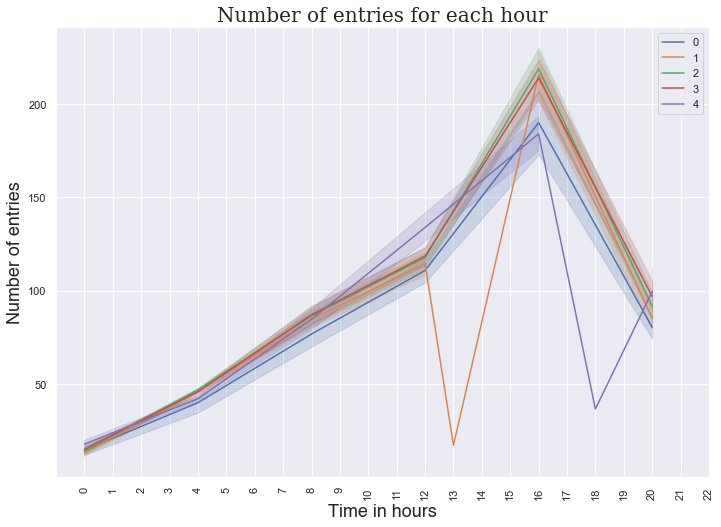

In [ ]:
fig, ax = plt.subplots()
for day in range(0,7):
  sns.lineplot(STA3[STA3.WEEKDAY==day].TIME, STA3[STA3.WEEKDAY==day].Hourly_Entries, ax=ax, label=day);
  sns.set(rc={'figure.figsize':(11.7,8.27)})
  ax.set_title("Number of entries for each hour",fontsize=20,**csfont)
  ax.set_xlabel("Time in hours", fontsize=18, **hfont)
  ax.set_ylabel("Number of entries", fontsize=18, **hfont)
  ax.set_xticks(range(0,23));
plt.xticks(rotation = 90);

--------------------------------------------------------------------------------------------------

# Vaccine NYChealth dataset mapped to MTA turnstile dataset

In [ ]:
#Importing covid-19 vaccine percentage dataset for NYCh
vaccine = pd.read_csv("https://raw.githubusercontent.com/nychealth/covid-vaccine-data/main/people/coverage-by-modzcta-allages.csv")

In [ ]:
vaccine.head(10)

,DATE,NEIGHBORHOOD_NAME,BOROUGH,MODZCTA,Label,AGE_GROUP,POP_DENOMINATOR,COUNT_PARTIALLY_CUMULATIVE,COUNT_FULLY_CUMULATIVE,COUNT_1PLUS_CUMULATIVE,PERC_PARTIALLY,PERC_FULLY,PERC_1PLUS
0,2021-09-06,Chelsea/NoMad/West Chelsea,Manhattan,10001,"10001, 10118",All ages,27613,4888,27405,32293,18,99,117
1,2021-09-06,Chinatown/Lower East Side,Manhattan,10002,10002,All ages,75323,4529,57062,61591,6,76,82
2,2021-09-06,East Village/Gramercy/Greenwich Village,Manhattan,10003,10003,All ages,53978,3007,37372,40379,6,69,75
3,2021-09-06,Financial District,Manhattan,10004,10004,All ages,2972,412,3473,3885,14,117,131
4,2021-09-06,Financial District,Manhattan,10005,10005,All ages,8757,663,7333,7996,8,84,91
5,2021-09-06,Financial District,Manhattan,10006,10006,All ages,3382,593,3750,4343,18,111,128
6,2021-09-06,TriBeCa,Manhattan,10007,10007,All ages,6991,547,6126,6673,8,88,95
7,2021-09-06,Alphabet City/East Village/Stuyvesant Town-Coo...,Manhattan,10009,10009,All ages,57151,3070,39203,42273,5,69,74
8,2021-09-06,Flatiron/Gramercy/Kips Bay,Manhattan,10010,10010,All ages,33353,1730,23040,24770,5,69,74
9,2021-09-06,Chelsea,Manhattan,10011,10011,All ages,49746,2715,37606,40321,5,76,81


In [ ]:
total_vacc = vaccine[vaccine.PERC_FULLY <= 100].PERC_FULLY.sum()/vaccine[vaccine.PERC_FULLY <= 100].PERC_FULLY.count()
print("The total perctange of fully vaccinated: " , total_vacc)

The total perctange of fully vaccinated:  61.55803468208093


In [ ]:
total_vacc_more70 = vaccine[vaccine.PERC_FULLY >= 70].PERC_FULLY.count()
print("Number of subway stations vaccinated more than 70%: " , total_vacc_more70)

Number of subway stations vaccinated more than 70%:  52


In [ ]:
#There is ananomly percentage exceeding 1000
vaccine[vaccine.PERC_FULLY >= 100] 

,DATE,NEIGHBORHOOD_NAME,BOROUGH,MODZCTA,Label,AGE_GROUP,POP_DENOMINATOR,COUNT_PARTIALLY_CUMULATIVE,COUNT_FULLY_CUMULATIVE,COUNT_1PLUS_CUMULATIVE,PERC_PARTIALLY,PERC_FULLY,PERC_1PLUS
3,2021-09-06,Financial District,Manhattan,10004,10004,All ages,2972,412,3473,3885,14,117,131
5,2021-09-06,Financial District,Manhattan,10006,10006,All ages,3382,593,3750,4343,18,111,128
15,2021-09-06,Hell's Kitchen/Midtown Manhattan,Manhattan,10018,10018,All ages,11791,4757,15938,20695,40,135,176
32,2021-09-06,Hell's Kitchen/Midtown Manhattan,Manhattan,10036,10036,All ages,27242,6379,32311,38690,23,119,142


In [ ]:
vaccine.PERC_FULLY = vaccine.PERC_FULLY.apply(lambda x: 100 if (x > 100) else x)

In [ ]:
vaccine.rename(columns={"MODZCTA":"ZIPCODE"}, inplace=True)

In [ ]:
vaccine.head()

,DATE,NEIGHBORHOOD_NAME,BOROUGH,ZIPCODE,Label,AGE_GROUP,POP_DENOMINATOR,COUNT_PARTIALLY_CUMULATIVE,COUNT_FULLY_CUMULATIVE,COUNT_1PLUS_CUMULATIVE,PERC_PARTIALLY,PERC_FULLY,PERC_1PLUS
0,2021-09-06,Chelsea/NoMad/West Chelsea,Manhattan,10001,"10001, 10118",All ages,27613,4888,27405,32293,18,99,117
1,2021-09-06,Chinatown/Lower East Side,Manhattan,10002,10002,All ages,75323,4529,57062,61591,6,76,82
2,2021-09-06,East Village/Gramercy/Greenwich Village,Manhattan,10003,10003,All ages,53978,3007,37372,40379,6,69,75
3,2021-09-06,Financial District,Manhattan,10004,10004,All ages,2972,412,3473,3885,14,100,131
4,2021-09-06,Financial District,Manhattan,10005,10005,All ages,8757,663,7333,7996,8,84,91


In [ ]:
vaccine.describe()

,ZIPCODE,POP_DENOMINATOR,COUNT_PARTIALLY_CUMULATIVE,COUNT_FULLY_CUMULATIVE,COUNT_1PLUS_CUMULATIVE,PERC_PARTIALLY,PERC_FULLY,PERC_1PLUS
count,177,177,177,177,177,177,177,177
mean,10810,47101,3161,28081,31242,7,62,70
std,578,26152,2040,15331,17034,3,14,18
min,10001,2972,228,2786,3029,4,38,44
25%,10301,27181,1730,16990,18991,5,51,57
50%,11109,42737,2690,26284,28942,6,61,67
75%,11361,66856,4355,38923,42535,7,72,77
max,11697,110370,13255,79750,87296,40,100,176


In [ ]:
#Getting zipcodes datasets to map to the NYC covid vaccine
mapped  = pd.read_csv("https://raw.githubusercontent.com/reiffs/202107_Reiff_Metis_EDA_Project/d570eb9a8827ce14e7fbc3c632775c00fb5d332f/raw_data_sets/station_zips.csv")
mapped.drop(columns="LINENAME", inplace=True)

In [ ]:
mapped.head()

,STATION,ZIPCODE
0,1 AV,10003
1,103 ST,10025
2,103 ST,10025
3,103 ST,10029
4,103 ST-CORONA,11368


In [ ]:
#Matching stations in MTA dataset stations with zipcode dataset
mapped.STATION = mapped.STATION.apply(lambda x : str(x).upper())

In [ ]:
mapped.STATION.value_counts()

23 ST           5
86 ST           5
125 ST          4
CHURCH AV       3
103 ST          3
               ..
BEACH 44 ST     1
BEACH 36 ST     1
BEACH 25 ST     1
BEACH 105 ST    1
ZEREGA AV       1
Name: STATION, Length: 379, dtype: int64

In [ ]:
vaccine.head()

,DATE,NEIGHBORHOOD_NAME,BOROUGH,ZIPCODE,Label,AGE_GROUP,POP_DENOMINATOR,COUNT_PARTIALLY_CUMULATIVE,COUNT_FULLY_CUMULATIVE,COUNT_1PLUS_CUMULATIVE,PERC_PARTIALLY,PERC_FULLY,PERC_1PLUS
0,2021-09-06,Chelsea/NoMad/West Chelsea,Manhattan,10001,"10001, 10118",All ages,27613,4888,27405,32293,18,99,117
1,2021-09-06,Chinatown/Lower East Side,Manhattan,10002,10002,All ages,75323,4529,57062,61591,6,76,82
2,2021-09-06,East Village/Gramercy/Greenwich Village,Manhattan,10003,10003,All ages,53978,3007,37372,40379,6,69,75
3,2021-09-06,Financial District,Manhattan,10004,10004,All ages,2972,412,3473,3885,14,100,131
4,2021-09-06,Financial District,Manhattan,10005,10005,All ages,8757,663,7333,7996,8,84,91


In [ ]:
vaccine.ZIPCODE

0      10001
1      10002
2      10003
3      10004
4      10005
       ...  
172    11691
173    11692
174    11693
175    11694
176    11697
Name: ZIPCODE, Length: 177, dtype: int64

In [ ]:
#Get the top stations
sorted_top_stations = turnstiles_df.groupby("STATION")[["Hourly_Entries","Hourly_EXITS"]].sum().reset_index().sort_values(by="Hourly_Entries",ascending=False).copy()
sorted_top_stations.rename(columns={"Hourly_Entries": "ENTRIES (Daily)","Hourly_EXITS": "EXITS (Daily)"},inplace=True)

In [ ]:
#Get the daily entries/exits
sorted_top_stations["ENTRIES (Daily)"] = sorted_top_stations["ENTRIES (Daily)"]/Numberofdays
sorted_top_stations["EXITS (Daily)"] = sorted_top_stations["EXITS (Daily)"]/Numberofdays

In [ ]:
sorted_top_stations.head()

,STATION,ENTRIES (Daily),EXITS (Daily)
61,34 ST-PENN STA,32471,40023
233,GRD CNTRL-42 ST,26014,35146
59,34 ST-HERALD SQ,24319,27741
46,23 ST,23943,27500
226,FULTON ST,21601,26556


In [ ]:
#Joining the top stations with zipcodes using the MTA dataset and zipcodes dataset
df_with_zipcode = pd.merge(sorted_top_stations, mapped, on='STATION').groupby(["STATION"])["ZIPCODE","ENTRIES (Daily)"].mean()
df_with_zipcode = df_with_zipcode.sort_values(by= "ENTRIES (Daily)",ascending=False)
df_with_zipcode

/var/folders/0r/78x4fk3n76q1x_swj64_76f40000gn/T/ipykernel_4145/1738542479.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_with_zipcode = pd.merge(sorted_top_stations, mapped, on='STATION').groupby(["STATION"])["ZIPCODE","ENTRIES (Daily)"].mean()


,ZIPCODE,ENTRIES (Daily)
STATION,,
34 ST-PENN STA,10004,32471
GRD CNTRL-42 ST,10017,26014
34 ST-HERALD SQ,10001,24319
23 ST,10011,23943
FULTON ST,10431,21601
...,...,...
ROCKAWAY PARK B,11694,274
BEACH 98 ST,11694,180
BEACH 105 ST,11694,121


In [ ]:
#What a single row represent?
df_with_zipcode.reset_index()[df_with_zipcode.reset_index().STATION == '34 ST-PENN STA']

,STATION,ZIPCODE,ENTRIES (Daily)
0,34 ST-PENN STA,10004,32471


In [ ]:
df_with_zipcode = df_with_zipcode.reset_index() #reset index

In [ ]:
#Merging df_with_zipcode with vaccine dataset
MTA_vaccine = pd.merge(df_with_zipcode,vaccine, on='ZIPCODE', how='inner')

/Users/yazeed/miniforge3/envs/MLenva/lib/python3.8/site-packages/pandas/core/reshape/merge.py:1200: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  warnings.warn(


In [ ]:
MTA_vaccine

,STATION,ZIPCODE,ENTRIES (Daily),DATE,NEIGHBORHOOD_NAME,BOROUGH,Label,AGE_GROUP,POP_DENOMINATOR,COUNT_PARTIALLY_CUMULATIVE,COUNT_FULLY_CUMULATIVE,COUNT_1PLUS_CUMULATIVE,PERC_PARTIALLY,PERC_FULLY,PERC_1PLUS
0,GRD CNTRL-42 ST,10017,26014,2021-09-06,East Midtown/Murray Hill,Manhattan,10017,All ages,15613,1939,14582,16521,12,93,106
1,34 ST-HERALD SQ,10001,24319,2021-09-06,Chelsea/NoMad/West Chelsea,Manhattan,"10001, 10118",All ages,27613,4888,27405,32293,18,99,117
2,34 ST-HUDSON YD,10001,6283,2021-09-06,Chelsea/NoMad/West Chelsea,Manhattan,"10001, 10118",All ages,27613,4888,27405,32293,18,99,117
3,THIRTY THIRD ST,10001,6192,2021-09-06,Chelsea/NoMad/West Chelsea,Manhattan,"10001, 10118",All ages,27613,4888,27405,32293,18,99,117
4,14 ST-UNION SQ,10003,19432,2021-09-06,East Village/Gramercy/Greenwich Village,Manhattan,10003,All ages,53978,3007,37372,40379,6,69,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,BEACH 90 ST,11693,342,2021-09-06,Arverne/Broad Channel,Queens,11693,All ages,12672,650,5795,6445,5,46,51
330,BROAD CHANNEL,11693,112,2021-09-06,Arverne/Broad Channel,Queens,11693,All ages,12672,650,5795,6445,5,46,51
331,ROCKAWAY PARK B,11694,274,2021-09-06,Belle Harbor-Neponsit/Rockaway Park,Queens,11694,All ages,20779,1060,10923,11983,5,53,58
332,BEACH 98 ST,11694,180,2021-09-06,Belle Harbor-Neponsit/Rockaway Park,Queens,11694,All ages,20779,1060,10923,11983,5,53,58


In [ ]:
MTA_vaccine.describe()

,ZIPCODE,ENTRIES (Daily),POP_DENOMINATOR,COUNT_PARTIALLY_CUMULATIVE,COUNT_FULLY_CUMULATIVE,COUNT_1PLUS_CUMULATIVE,PERC_PARTIALLY,PERC_FULLY,PERC_1PLUS
count,334,334,334,334,334,334,334,334,334
mean,10796,3376,58171,4104,34269,38372,7,62,70
std,562,3561,25467,2134,14354,16030,3,16,19
min,10001,5,2972,412,3473,3885,4,38,44
25%,10049,1304,37830,2609,24725,27483,6,49,57
50%,11106,2275,58415,3887,32832,38690,7,58,65
75%,11225,4030,78101,5730,42525,48247,8,75,81
max,11694,26014,110370,13255,79750,87296,23,100,142


In [ ]:
MTA_vaccine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 333
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   STATION                     334 non-null    object 
 1   ZIPCODE                     334 non-null    float64
 2   ENTRIES (Daily)             334 non-null    float64
 3   DATE                        334 non-null    object 
 4   NEIGHBORHOOD_NAME           334 non-null    object 
 5   BOROUGH                     334 non-null    object 
 6   Label                       334 non-null    object 
 7   AGE_GROUP                   334 non-null    object 
 8   POP_DENOMINATOR             334 non-null    float64
 9   COUNT_PARTIALLY_CUMULATIVE  334 non-null    int64  
 10  COUNT_FULLY_CUMULATIVE      334 non-null    int64  
 11  COUNT_1PLUS_CUMULATIVE      334 non-null    int64  
 12  PERC_PARTIALLY              334 non-null    float64
 13  PERC_FULLY                  334 non

In [ ]:
MTA_vaccine

,STATION,ZIPCODE,ENTRIES (Daily),DATE,NEIGHBORHOOD_NAME,BOROUGH,Label,AGE_GROUP,POP_DENOMINATOR,COUNT_PARTIALLY_CUMULATIVE,COUNT_FULLY_CUMULATIVE,COUNT_1PLUS_CUMULATIVE,PERC_PARTIALLY,PERC_FULLY,PERC_1PLUS
0,GRD CNTRL-42 ST,10017,26014,2021-09-06,East Midtown/Murray Hill,Manhattan,10017,All ages,15613,1939,14582,16521,12,93,106
1,34 ST-HERALD SQ,10001,24319,2021-09-06,Chelsea/NoMad/West Chelsea,Manhattan,"10001, 10118",All ages,27613,4888,27405,32293,18,99,117
2,34 ST-HUDSON YD,10001,6283,2021-09-06,Chelsea/NoMad/West Chelsea,Manhattan,"10001, 10118",All ages,27613,4888,27405,32293,18,99,117
3,THIRTY THIRD ST,10001,6192,2021-09-06,Chelsea/NoMad/West Chelsea,Manhattan,"10001, 10118",All ages,27613,4888,27405,32293,18,99,117
4,14 ST-UNION SQ,10003,19432,2021-09-06,East Village/Gramercy/Greenwich Village,Manhattan,10003,All ages,53978,3007,37372,40379,6,69,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,BEACH 90 ST,11693,342,2021-09-06,Arverne/Broad Channel,Queens,11693,All ages,12672,650,5795,6445,5,46,51
330,BROAD CHANNEL,11693,112,2021-09-06,Arverne/Broad Channel,Queens,11693,All ages,12672,650,5795,6445,5,46,51
331,ROCKAWAY PARK B,11694,274,2021-09-06,Belle Harbor-Neponsit/Rockaway Park,Queens,11694,All ages,20779,1060,10923,11983,5,53,58
332,BEACH 98 ST,11694,180,2021-09-06,Belle Harbor-Neponsit/Rockaway Park,Queens,11694,All ages,20779,1060,10923,11983,5,53,58


In [ ]:
#Group by stations and get entries and percent of fully vaccinated
MTA_vaccine_Table = MTA_vaccine.groupby(["STATION",])["ENTRIES (Daily)","PERC_FULLY"].mean().reset_index()

/var/folders/0r/78x4fk3n76q1x_swj64_76f40000gn/T/ipykernel_4145/186387688.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  MTA_vaccine_Table = MTA_vaccine.groupby(["STATION",])["ENTRIES (Daily)","PERC_FULLY"].mean().reset_index()


In [ ]:
MTA_vaccine_Table.sort_values(by = ["ENTRIES (Daily)"], ascending=[False])

,STATION,ENTRIES (Daily),PERC_FULLY
207,GRD CNTRL-42 ST,26014,93
54,34 ST-HERALD SQ,24319,99
11,14 ST-UNION SQ,19432,69
228,JKSN HT-ROOSVLT,19391,84
310,TIMES SQ-42 ST,18132,100
...,...,...,...
292,ROCKAWAY PARK B,274,53
131,BEACH 98 ST,180,53
124,BEACH 105 ST,121,53
145,BROAD CHANNEL,112,46


In [ ]:
 #Get stations with 65% vaccine percent 
 MTA_vaccine_Table_65 = MTA_vaccine_Table.groupby(["STATION"])["ENTRIES (Daily)","PERC_FULLY"].mean().reset_index()

/var/folders/0r/78x4fk3n76q1x_swj64_76f40000gn/T/ipykernel_4145/2119936898.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  MTA_vaccine_Table_65 = MTA_vaccine_Table.groupby(["STATION"])["ENTRIES (Daily)","PERC_FULLY"].mean().reset_index()


In [ ]:
MTA_vaccine_Table_65

,STATION,ENTRIES (Daily),PERC_FULLY
0,1 AV,5755,69
1,103 ST-CORONA,8257,67
2,110 ST,3516,56
3,116 ST,10832,56
4,116 ST-COLUMBIA,1595,54
...,...,...,...
329,WOODLAWN,3005,50
330,WORLD TRADE CTR,3569,88
331,WTC-CORTLANDT,2659,88
332,YORK ST,3345,76


In [ ]:
MTA_vaccine_Table_65 = MTA_vaccine_Table_65.set_index("STATION") #set index to STATION

In [ ]:
MTA_vaccine_Table_65 = MTA_vaccine_Table_65[(MTA_vaccine_Table_65.PERC_FULLY<65)]  #only get stations of 65% percentage vaccine

In [ ]:
MTA_vaccine_Table_65

,ENTRIES (Daily),PERC_FULLY
STATION,,
110 ST,3516,56
116 ST,10832,56
116 ST-COLUMBIA,1595,54
121 ST,861,63
125 ST,15184,56
...,...,...
WEST FARMS SQ,1791,46
WHITLOCK AV,772,49
WILSON AV,1634,45


In [ ]:
MTA_vaccine_Table_65 = MTA_vaccine_Table_65.reset_index()

In [ ]:
MTA_vaccine_Table_65.sort_values(by="ENTRIES (Daily)", ascending=False)

,STATION,ENTRIES (Daily),PERC_FULLY
4,125 ST,15184,56
46,ATL AV-BARCLAY,13657,64
1,116 ST,10832,56
129,KINGS HWY,8580,53
97,DEKALB AV,8278,40
...,...,...,...
183,TOMPKINSVILLE,276,58
169,ROCKAWAY PARK B,274,53
66,BEACH 98 ST,180,53
59,BEACH 105 ST,121,53


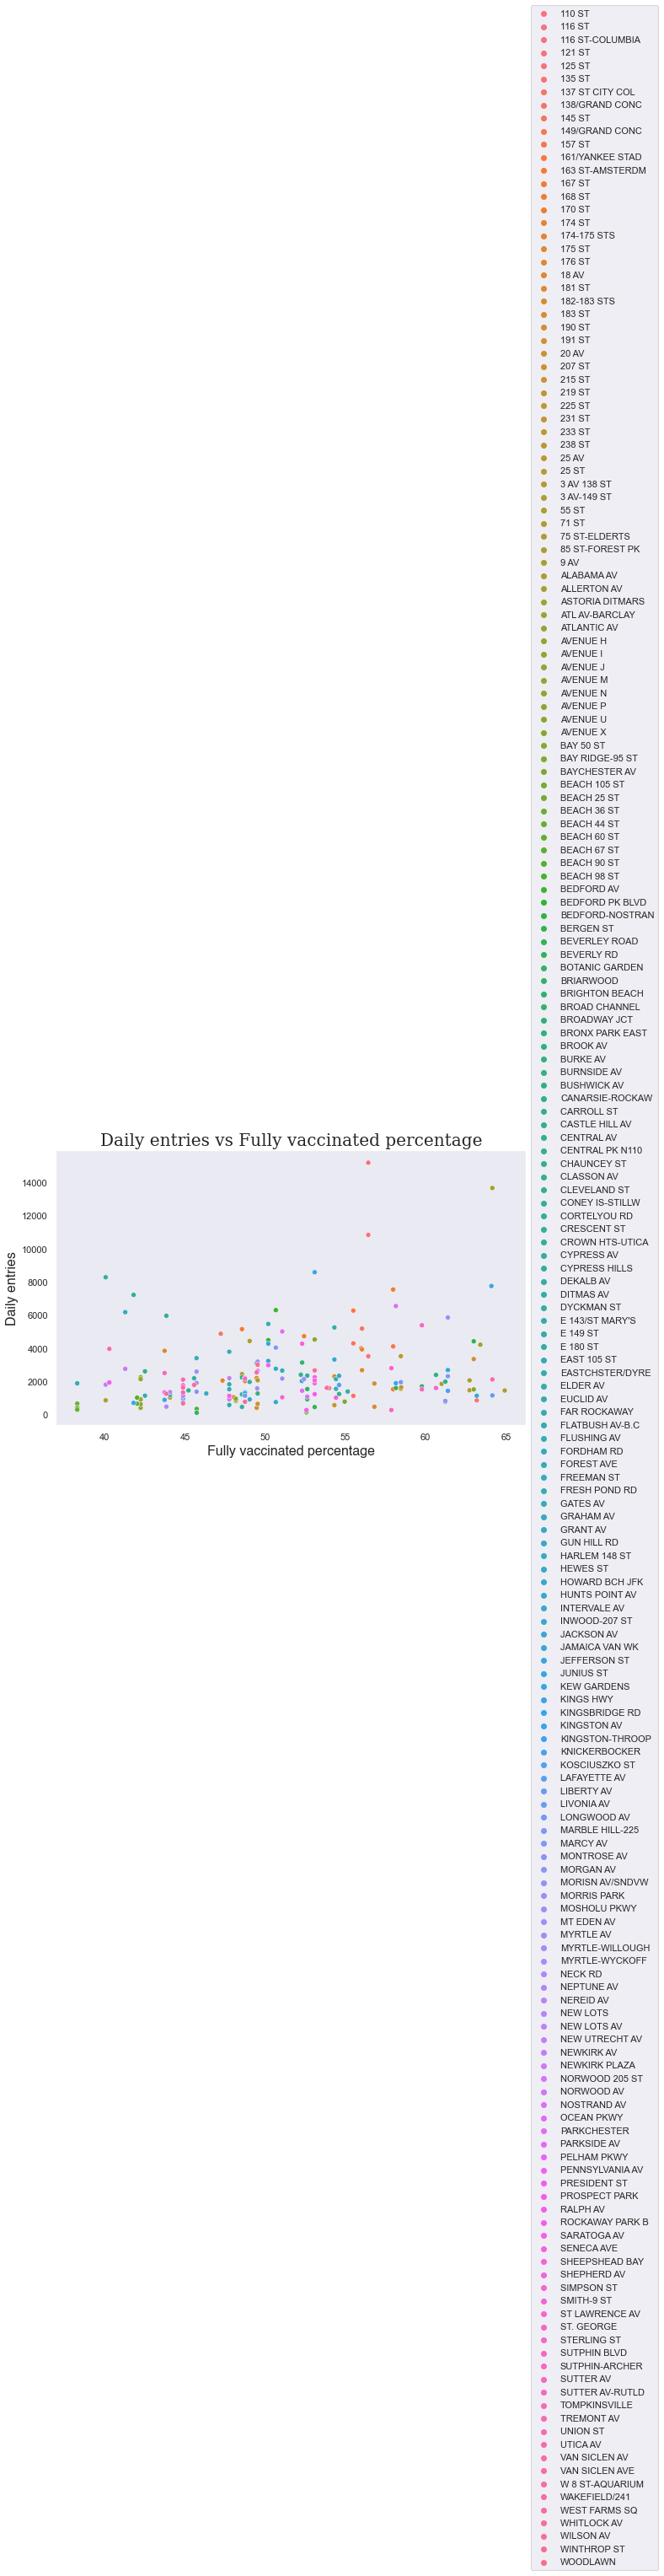

In [ ]:
plt.figure(figsize=(10, 6))
g = sns.scatterplot(x=MTA_vaccine_Table_65["PERC_FULLY"], y=MTA_vaccine_Table_65["ENTRIES (Daily)"],hue=MTA_vaccine_Table_65.STATION)
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
g.set_title("Daily entries vs Fully vaccinated percentage",fontsize=20,**csfont)
g.set_xlabel("Fully vaccinated percentage",fontsize=16,**hfont)
g.set_ylabel("Daily entries",fontsize=16,**hfont)
g.grid()


In [ ]:
MTA_vaccine_Table_65 = MTA_vaccine_Table_65[(MTA_vaccine_Table_65.PERC_FULLY<65) & (MTA_vaccine_Table_65["ENTRIES (Daily)"]>5000)]

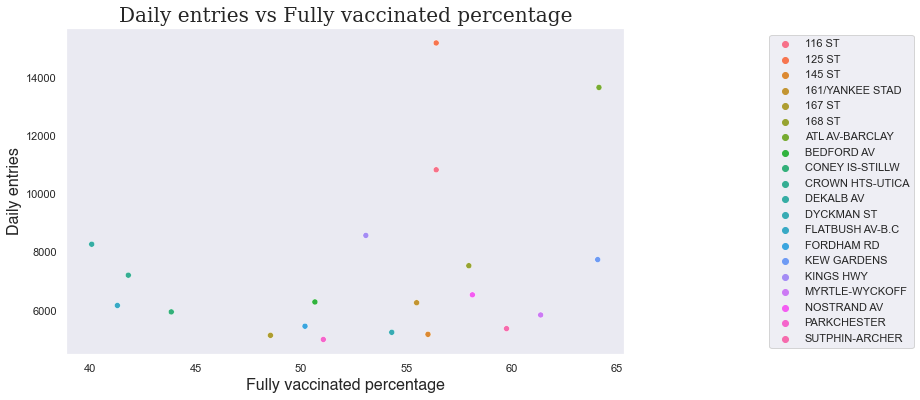

In [ ]:
plt.figure(figsize=(10, 6))
g = sns.scatterplot(x=MTA_vaccine_Table_65.PERC_FULLY, y=MTA_vaccine_Table_65["ENTRIES (Daily)"],hue=MTA_vaccine_Table_65.STATION)
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
g.set_title("Daily entries vs Fully vaccinated percentage",fontsize=20,**csfont)
g.set_xlabel("Fully vaccinated percentage",fontsize=16,**hfont)
g.set_ylabel("Daily entries",fontsize=16,**hfont)
g.grid()

In [ ]:
MTA_vaccine_Table_65 = MTA_vaccine_Table_65.sort_values(by="ENTRIES (Daily)", ascending=False)

/Users/yazeed/miniforge3/envs/MLenva/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


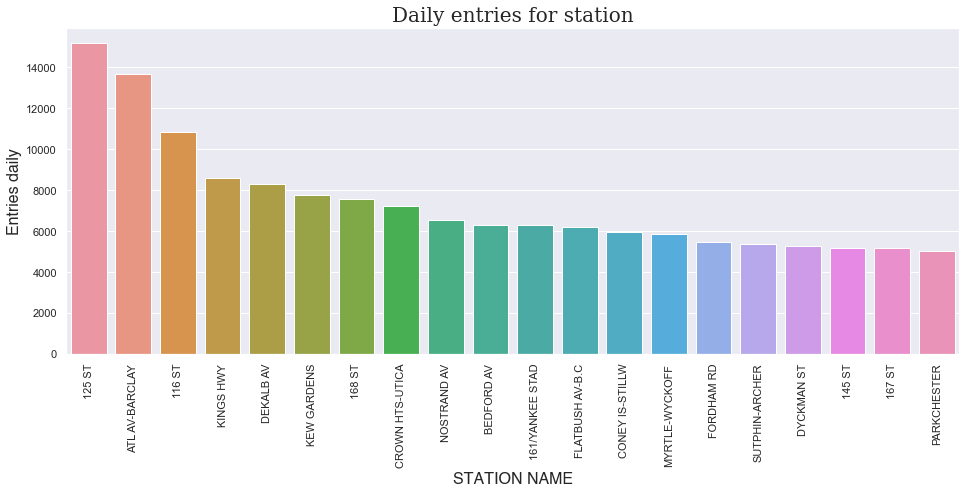

In [ ]:
plt.figure(figsize=(16, 6))
ax = sns.barplot(MTA_vaccine_Table_65.STATION, MTA_vaccine_Table_65["ENTRIES (Daily)"]);
ax.set_title("Daily entries for station",fontsize=20,**csfont)
ax.set_xlabel("STATION NAME",fontsize=16,**hfont)
ax.set_ylabel("Entries daily",fontsize=16,**hfont)
plt.xticks(rotation = 90);

In [ ]:
MTA_vaccine_Table_65

,STATION,ENTRIES (Daily),PERC_FULLY
4,125 ST,15184,56
46,ATL AV-BARCLAY,13657,64
1,116 ST,10832,56
129,KINGS HWY,8580,53
97,DEKALB AV,8278,40
128,KEW GARDENS,7750,64
14,168 ST,7540,58
94,CROWN HTS-UTICA,7215,42
160,NOSTRAND AV,6541,58
67,BEDFORD AV,6297,51


In [ ]:
#This function find number of people unvaccinated to each stations
def Percent(row):
  return (1-(row['PERC_FULLY']/100) )*(row['ENTRIES (Daily)'])
MTA_vaccine_Table_65['Unvaccinated of daily entries'] = MTA_vaccine_Table_65.apply(Percent,axis=1)
MTA_vaccine_Table_65.head()

,STATION,ENTRIES (Daily),PERC_FULLY,Unvaccinated of daily entries
4,125 ST,15184,56,6617
46,ATL AV-BARCLAY,13657,64,4896
1,116 ST,10832,56,4721
129,KINGS HWY,8580,53,4026
97,DEKALB AV,8278,40,4962


In [ ]:
MTA_vaccine_Table_65 = MTA_vaccine_Table_65.sort_values(by ="Unvaccinated of daily entries", ascending=False)

In [ ]:
MTA_vaccine_Table_65.head()

,STATION,ENTRIES (Daily),PERC_FULLY,Unvaccinated of daily entries
4,125 ST,15184,56,6617
97,DEKALB AV,8278,40,4962
46,ATL AV-BARCLAY,13657,64,4896
1,116 ST,10832,56,4721
94,CROWN HTS-UTICA,7215,42,4199


/Users/yazeed/miniforge3/envs/MLenva/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


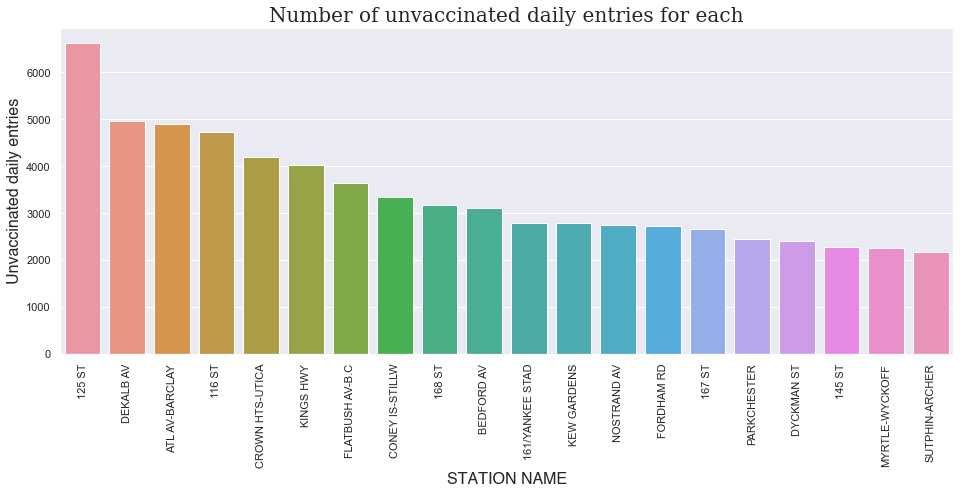

In [ ]:
plt.figure(figsize=(16, 6))
ax = sns.barplot(MTA_vaccine_Table_65.STATION, MTA_vaccine_Table_65["Unvaccinated of daily entries"]);
ax.set_title("Number of unvaccinated daily entries for each",fontsize=20,**csfont)
ax.set_xlabel("STATION NAME",fontsize=16,**hfont)
ax.set_ylabel("Unvaccinated daily entries",fontsize=16,**hfont)
plt.xticks(rotation = 90);

## Finding top crowded stations with low unvacinnated people (For weekdays)

In [ ]:
top_stations_byweekdays = turnstiles_df.copy()

In [ ]:
top_stations_byweekdays["dayofweek"] = top_stations_byweekdays.DATE_TIME.dt.dayofweek

In [ ]:
top_stations_byweekdays[top_stations_byweekdays.dayofweek<=4]

,STATION,TURNSTILE ID,DATE_TIME,ENTRIES,EXITS,Previous_Entries,Previous_EXITS,Hourly_Entries,Hourly_EXITS,dayofweek
2382096,JOURNAL SQUARE,JOURNAL SQUARE R552 PTH03 00-00-07,2021-05-04 06:11:42,407376,108528,408275,108543,899,15,1
2144926,GRD CNTRL-42 ST,GRD CNTRL-42 ST R046 R238 00-06-01,2021-08-03 16:00:00,424125,287219,425024,287556,899,337,1
885603,59 ST COLUMBUS,59 ST COLUMBUS R084 N051 02-00-00,2021-06-15 16:00:00,15825569,2296354,15826468,2296513,899,159,1
2775064,PARKCHESTER,PARKCHESTER R222 R417 00-00-00,2021-06-08 05:00:00,11934360,703254,11935259,703269,899,15,1
25279,103 ST-CORONA,103 ST-CORONA R208 R529 00-00-03,2021-05-14 04:00:00,2159469,810589,2160368,810601,899,12,4
...,...,...,...,...,...,...,...,...,...,...
1695322,CITY HALL,CITY HALL R087 A047 00-03-01,2021-05-19 00:00:00,875543,200133,875543,200134,0,1,2
1695316,CITY HALL,CITY HALL R087 A047 00-03-01,2021-05-18 00:00:00,875384,200090,875384,200091,0,1,1
1695311,CITY HALL,CITY HALL R087 A047 00-03-01,2021-05-17 04:00:00,875248,200059,875248,200059,0,0,0
1695293,CITY HALL,CITY HALL R087 A047 00-03-01,2021-05-14 04:00:00,874923,199987,874923,199987,0,0,4


In [ ]:
Numberofdays_4 = len(top_stations_byweekdays[top_stations_byweekdays.dayofweek<=4].DATE_TIME.dt.date.unique())
print("Number of weekdays: ",Numberofdays_4)

Number of weekdays:  90


Similar to what was done in the past section.

In [ ]:
top_stations_byweekdays = top_stations_byweekdays[top_stations_byweekdays.dayofweek<=4].groupby("STATION")[["Hourly_Entries","Hourly_EXITS"]].sum().reset_index().sort_values(by="Hourly_Entries",ascending=False).copy()
top_stations_byweekdays.rename(columns={"Hourly_Entries": "ENTRIES (Daily)","Hourly_EXITS": "EXITS (Daily)"},inplace=True)

In [ ]:
top_stations_byweekdays

,STATION,ENTRIES (Daily),EXITS (Daily)
61,34 ST-PENN STA,3263720,3883944
233,GRD CNTRL-42 ST,2738533,3624031
46,23 ST,2445114,2762053
59,34 ST-HERALD SQ,2441433,2751534
226,FULTON ST,2228951,2717967
...,...,...,...
333,ROCKAWAY PARK B,26806,42209
148,BEACH 98 ST,17309,27927
162,BROAD CHANNEL,11895,6555
141,BEACH 105 ST,10793,19422


In [ ]:
top_stations_byweekdays["ENTRIES (Daily)"] = top_stations_byweekdays["ENTRIES (Daily)"] / Numberofdays_4
top_stations_byweekdays["EXITS (Daily)"] = top_stations_byweekdays["EXITS (Daily)"] / Numberofdays_4

In [ ]:
top_stations_byweekdays = top_stations_byweekdays.sort_values(by="ENTRIES (Daily)", ascending=False)

In [ ]:
top_stations_byweekdays

,STATION,ENTRIES (Daily),EXITS (Daily)
61,34 ST-PENN STA,36264,43155
233,GRD CNTRL-42 ST,30428,40267
46,23 ST,27168,30689
59,34 ST-HERALD SQ,27127,30573
226,FULTON ST,24766,30200
...,...,...,...
333,ROCKAWAY PARK B,298,469
148,BEACH 98 ST,192,310
162,BROAD CHANNEL,132,73
141,BEACH 105 ST,120,216


In [ ]:
df_with_zipcode = pd.merge(top_stations_byweekdays, mapped, on='STATION').groupby(["STATION"])["ZIPCODE","ENTRIES (Daily)"].mean()
df_with_zipcode = df_with_zipcode.sort_values(by= "ENTRIES (Daily)",ascending=False)
df_with_zipcode

/var/folders/0r/78x4fk3n76q1x_swj64_76f40000gn/T/ipykernel_4145/161769218.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_with_zipcode = pd.merge(top_stations_byweekdays, mapped, on='STATION').groupby(["STATION"])["ZIPCODE","ENTRIES (Daily)"].mean()


,ZIPCODE,ENTRIES (Daily)
STATION,,
34 ST-PENN STA,10004,36264
GRD CNTRL-42 ST,10017,30428
23 ST,10011,27168
34 ST-HERALD SQ,10001,27127
FULTON ST,10431,24766
...,...,...
ROCKAWAY PARK B,11694,298
BEACH 98 ST,11694,192
BROAD CHANNEL,11693,132


In [ ]:
df_with_zipcode = df_with_zipcode.reset_index()

In [ ]:
MTA_vaccine = pd.merge(df_with_zipcode,vaccine, on='ZIPCODE', how='inner')

/Users/yazeed/miniforge3/envs/MLenva/lib/python3.8/site-packages/pandas/core/reshape/merge.py:1200: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  warnings.warn(


In [ ]:
MTA_vaccine.head()

,STATION,ZIPCODE,ENTRIES (Daily),DATE,NEIGHBORHOOD_NAME,BOROUGH,Label,AGE_GROUP,POP_DENOMINATOR,COUNT_PARTIALLY_CUMULATIVE,COUNT_FULLY_CUMULATIVE,COUNT_1PLUS_CUMULATIVE,PERC_PARTIALLY,PERC_FULLY,PERC_1PLUS
0,GRD CNTRL-42 ST,10017,30428,2021-09-06,East Midtown/Murray Hill,Manhattan,10017,All ages,15613,1939,14582,16521,12,93,106
1,34 ST-HERALD SQ,10001,27127,2021-09-06,Chelsea/NoMad/West Chelsea,Manhattan,"10001, 10118",All ages,27613,4888,27405,32293,18,99,117
2,THIRTY THIRD ST,10001,6854,2021-09-06,Chelsea/NoMad/West Chelsea,Manhattan,"10001, 10118",All ages,27613,4888,27405,32293,18,99,117
3,34 ST-HUDSON YD,10001,6807,2021-09-06,Chelsea/NoMad/West Chelsea,Manhattan,"10001, 10118",All ages,27613,4888,27405,32293,18,99,117
4,JKSN HT-ROOSVLT,11372,21161,2021-09-06,Jackson Heights,Queens,11372,All ages,60683,5433,50833,56266,9,84,93


In [ ]:
MTA_vaccine_Table = MTA_vaccine.groupby(["STATION",])["ENTRIES (Daily)","PERC_FULLY"].mean().reset_index()

/var/folders/0r/78x4fk3n76q1x_swj64_76f40000gn/T/ipykernel_4145/1449586170.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  MTA_vaccine_Table = MTA_vaccine.groupby(["STATION",])["ENTRIES (Daily)","PERC_FULLY"].mean().reset_index()


In [ ]:
MTA_vaccine_Table.sort_values(by = ["ENTRIES (Daily)"], ascending=[False])

,STATION,ENTRIES (Daily),PERC_FULLY
207,GRD CNTRL-42 ST,30428,93
54,34 ST-HERALD SQ,27127,99
228,JKSN HT-ROOSVLT,21161,84
11,14 ST-UNION SQ,21073,69
310,TIMES SQ-42 ST,19937,100
...,...,...,...
292,ROCKAWAY PARK B,298,53
131,BEACH 98 ST,192,53
145,BROAD CHANNEL,132,46
124,BEACH 105 ST,120,53


In [ ]:
 MTA_vaccine_Table_65_weekday = MTA_vaccine_Table.groupby(["STATION"])["ENTRIES (Daily)","PERC_FULLY"].mean().reset_index()

/var/folders/0r/78x4fk3n76q1x_swj64_76f40000gn/T/ipykernel_4145/3838172447.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  MTA_vaccine_Table_65_weekday = MTA_vaccine_Table.groupby(["STATION"])["ENTRIES (Daily)","PERC_FULLY"].mean().reset_index()


In [ ]:
MTA_vaccine_Table_65_weekday

,STATION,ENTRIES (Daily),PERC_FULLY
0,1 AV,6120,69
1,103 ST-CORONA,9122,67
2,110 ST,4034,56
3,116 ST,12183,56
4,116 ST-COLUMBIA,1868,54
...,...,...,...
329,WOODLAWN,3408,50
330,WORLD TRADE CTR,4081,88
331,WTC-CORTLANDT,2882,88
332,YORK ST,3641,76


In [ ]:
MTA_vaccine_Table_65_weekday = MTA_vaccine_Table_65_weekday.set_index("STATION")

In [ ]:
MTA_vaccine_Table_65_weekday = MTA_vaccine_Table_65_weekday[(MTA_vaccine_Table_65_weekday.PERC_FULLY<65)] #& (MTA_vaccine_Table_65.ENTRIES>0.9e6)]

In [ ]:
MTA_vaccine_Table_65_weekday

,ENTRIES (Daily),PERC_FULLY
STATION,,
110 ST,4034,56
116 ST,12183,56
116 ST-COLUMBIA,1868,54
121 ST,1020,63
125 ST,16843,56
...,...,...
WEST FARMS SQ,2029,46
WHITLOCK AV,903,49
WILSON AV,1789,45


In [ ]:
MTA_vaccine_Table_65_weekday = MTA_vaccine_Table_65_weekday.reset_index()

In [ ]:
MTA_vaccine_Table_65_weekday.sort_values(by="ENTRIES (Daily)", ascending=False)

,STATION,ENTRIES (Daily),PERC_FULLY
4,125 ST,16843,56
46,ATL AV-BARCLAY,14946,64
1,116 ST,12183,56
129,KINGS HWY,10013,53
97,DEKALB AV,9179,40
...,...,...,...
62,BEACH 44 ST,337,38
169,ROCKAWAY PARK B,298,53
66,BEACH 98 ST,192,53
76,BROAD CHANNEL,132,46


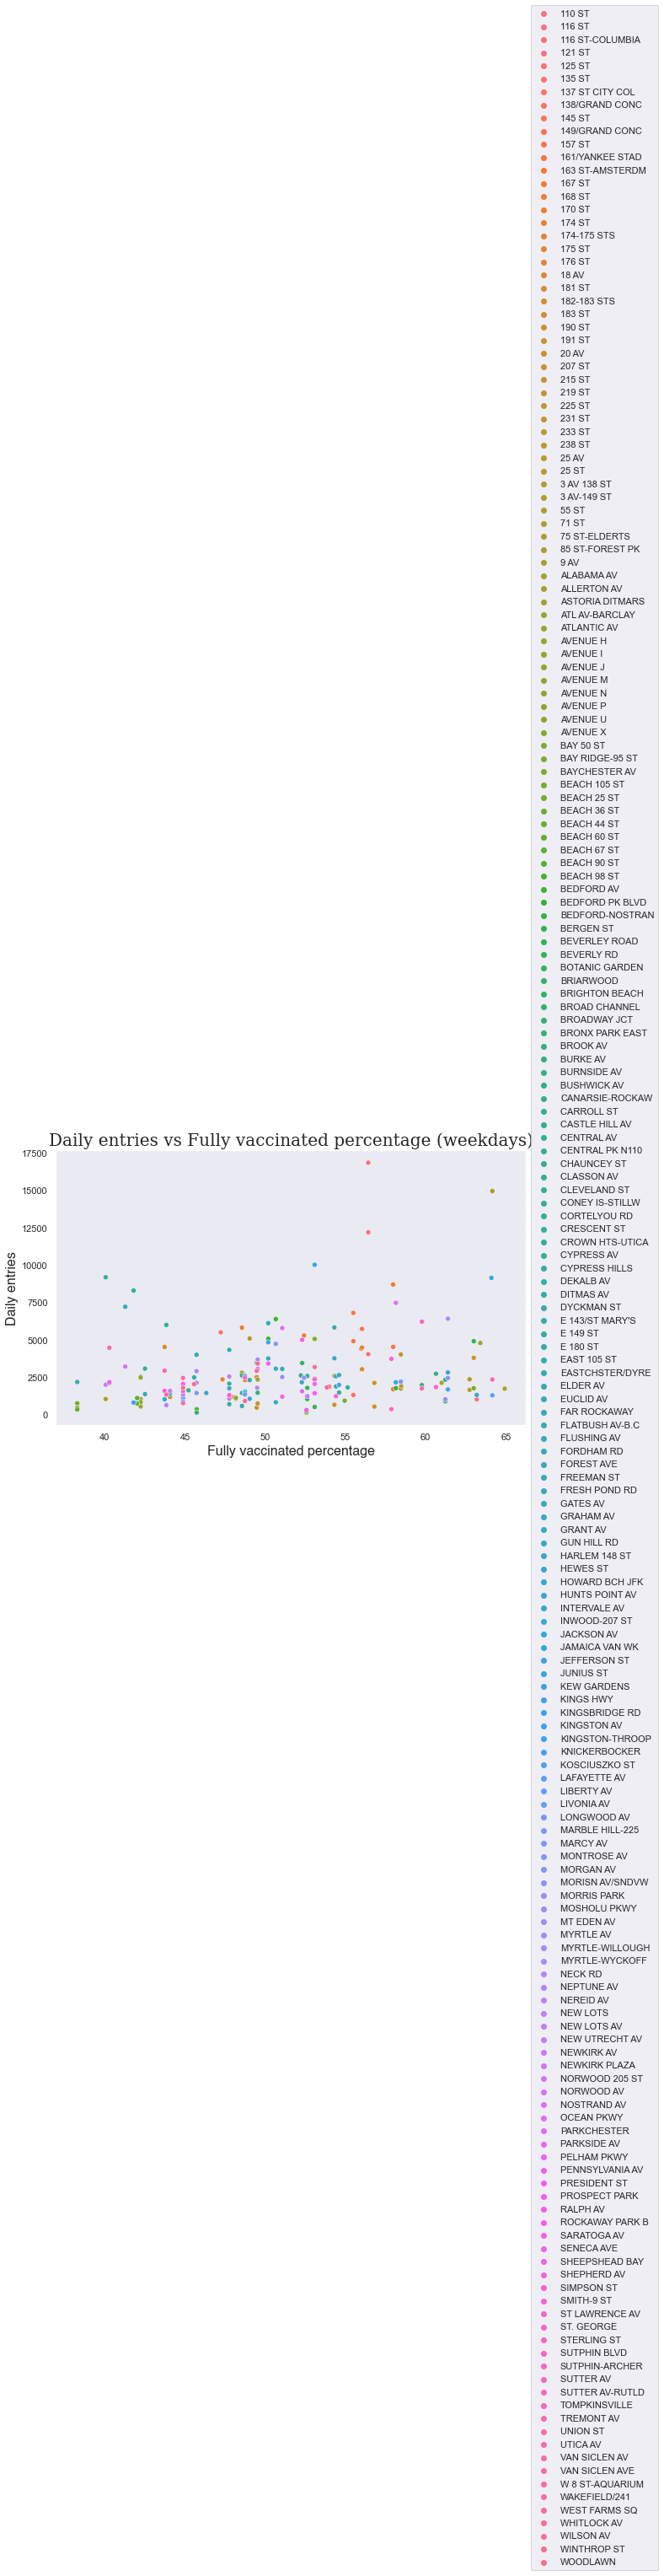

In [ ]:
plt.figure(figsize=(10, 6))
g = sns.scatterplot(x=MTA_vaccine_Table_65_weekday["PERC_FULLY"], y=MTA_vaccine_Table_65_weekday["ENTRIES (Daily)"],hue=MTA_vaccine_Table_65_weekday.STATION)
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
g.set_title("Daily entries vs Fully vaccinated percentage (weekdays)",fontsize=20,**csfont)
g.set_xlabel("Fully vaccinated percentage",fontsize=16,**hfont)
g.set_ylabel("Daily entries",fontsize=16,**hfont)
g.grid()


In [ ]:
MTA_vaccine_Table_65_weekday = MTA_vaccine_Table_65_weekday[(MTA_vaccine_Table_65_weekday.PERC_FULLY<65) & (MTA_vaccine_Table_65_weekday["ENTRIES (Daily)"]>5000)]

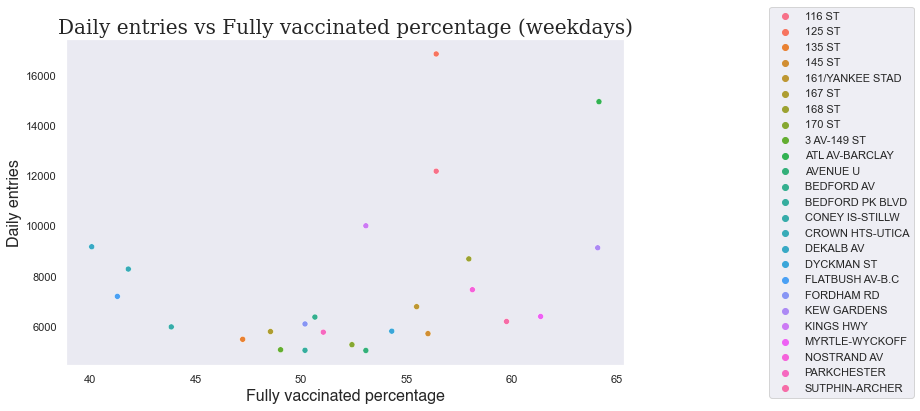

In [ ]:
plt.figure(figsize=(10, 6))
g = sns.scatterplot(x=MTA_vaccine_Table_65_weekday.PERC_FULLY, y=MTA_vaccine_Table_65_weekday["ENTRIES (Daily)"],hue=MTA_vaccine_Table_65_weekday.STATION)
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
g.set_title("Daily entries vs Fully vaccinated percentage (weekdays)",fontsize=20,**csfont)
g.set_xlabel("Fully vaccinated percentage",fontsize=16,**hfont)
g.set_ylabel("Daily entries",fontsize=16,**hfont)
g.grid()

In [ ]:
MTA_vaccine_Table_65_weekday = MTA_vaccine_Table_65_weekday.sort_values(by="ENTRIES (Daily)", ascending=False)
MTA_vaccine_Table_65_weekday.head(15)

,STATION,ENTRIES (Daily),PERC_FULLY
4,125 ST,16843,56
46,ATL AV-BARCLAY,14946,64
1,116 ST,12183,56
129,KINGS HWY,10013,53
97,DEKALB AV,9179,40
128,KEW GARDENS,9138,64
14,168 ST,8696,58
94,CROWN HTS-UTICA,8293,42
160,NOSTRAND AV,7472,58
108,FLATBUSH AV-B.C,7206,41


/Users/yazeed/miniforge3/envs/MLenva/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


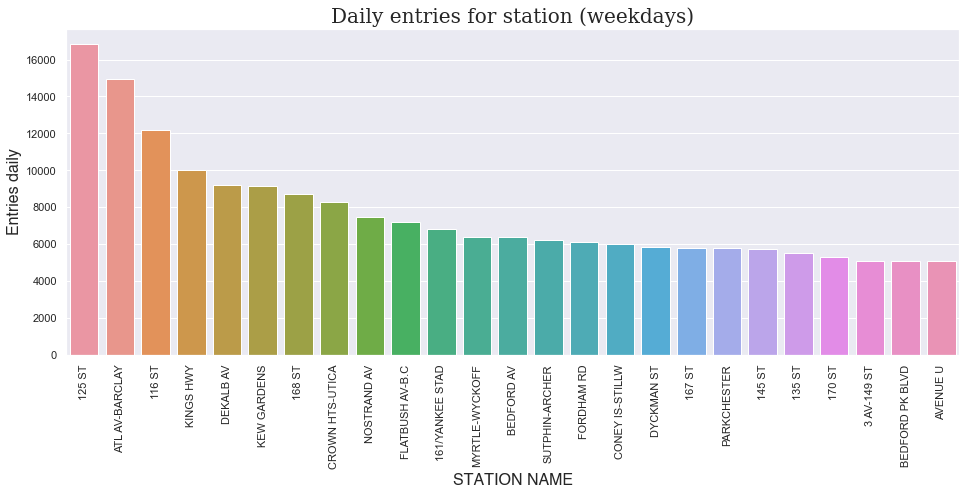

In [ ]:
plt.figure(figsize=(16, 6))
ax = sns.barplot(MTA_vaccine_Table_65_weekday.STATION, MTA_vaccine_Table_65_weekday["ENTRIES (Daily)"]);
ax.set_title("Daily entries for station (weekdays)",fontsize=20,**csfont)
ax.set_xlabel("STATION NAME",fontsize=16,**hfont)
ax.set_ylabel("Entries daily",fontsize=16,**hfont)
plt.xticks(rotation = 90);

In [ ]:
def Percent(row):
  return (1-(row['PERC_FULLY']/100) )*(row['ENTRIES (Daily)'])
MTA_vaccine_Table_65_weekday['Unvaccinated of daily entries'] = MTA_vaccine_Table_65_weekday.apply(Percent,axis=1)
MTA_vaccine_Table_65_weekday.head()

,STATION,ENTRIES (Daily),PERC_FULLY,Unvaccinated of daily entries
4,125 ST,16843,56,7340
46,ATL AV-BARCLAY,14946,64,5358
1,116 ST,12183,56,5309
129,KINGS HWY,10013,53,4698
97,DEKALB AV,9179,40,5502


In [ ]:
MTA_vaccine_Table_65_weekday = MTA_vaccine_Table_65_weekday.sort_values(by ="Unvaccinated of daily entries", ascending=False)

In [ ]:
MTA_vaccine_Table_65_weekday.head()

,STATION,ENTRIES (Daily),PERC_FULLY,Unvaccinated of daily entries
4,125 ST,16843,56,7340
97,DEKALB AV,9179,40,5502
46,ATL AV-BARCLAY,14946,64,5358
1,116 ST,12183,56,5309
94,CROWN HTS-UTICA,8293,42,4826


/Users/yazeed/miniforge3/envs/MLenva/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


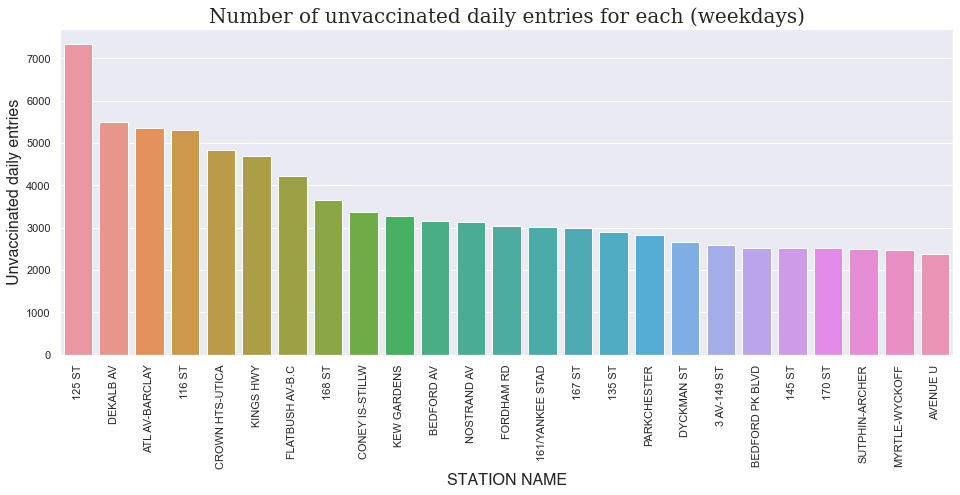

In [ ]:
plt.figure(figsize=(16, 6))
ax = sns.barplot(MTA_vaccine_Table_65_weekday.STATION, MTA_vaccine_Table_65_weekday["Unvaccinated of daily entries"]);
ax.set_title("Number of unvaccinated daily entries for each (weekdays)",fontsize=20,**csfont)
ax.set_xlabel("STATION NAME",fontsize=16,**hfont)
ax.set_ylabel("Unvaccinated daily entries",fontsize=16,**hfont)
plt.xticks(rotation = 90);

## Is there difference between weekdays and weekends for top unvaccinated stations?

In [ ]:
MTA_vaccine_Table_65

,STATION,ENTRIES (Daily),PERC_FULLY,Unvaccinated of daily entries
4,125 ST,15184,56,6617
97,DEKALB AV,8278,40,4962
46,ATL AV-BARCLAY,13657,64,4896
1,116 ST,10832,56,4721
94,CROWN HTS-UTICA,7215,42,4199
129,KINGS HWY,8580,53,4026
108,FLATBUSH AV-B.C,6176,41,3626
91,CONEY IS-STILLW,5956,44,3345
14,168 ST,7540,58,3169
67,BEDFORD AV,6297,51,3107


In [ ]:
turnstiles_df

,STATION,TURNSTILE ID,DATE_TIME,ENTRIES,EXITS,Previous_Entries,Previous_EXITS,Hourly_Entries,Hourly_EXITS
25279,103 ST-CORONA,103 ST-CORONA R208 R529 00-00-03,2021-05-14 04:00:00,2159469,810589,2160368,810601,899,12
2382107,JOURNAL SQUARE,JOURNAL SQUARE R552 PTH03 00-00-07,2021-05-04 06:11:42,407376,108528,408275,108543,899,15
2145832,GRD CNTRL-42 ST,GRD CNTRL-42 ST R046 R238 00-06-02,2021-08-26 16:00:00,692063,581046,692962,581508,899,462
2775075,PARKCHESTER,PARKCHESTER R222 R417 00-00-00,2021-06-08 05:00:00,11934360,703254,11935259,703269,899,15
885614,59 ST COLUMBUS,59 ST COLUMBUS R084 N051 02-00-00,2021-06-15 16:00:00,15825569,2296354,15826468,2296513,899,159
...,...,...,...,...,...,...,...,...,...
1695376,CITY HALL,CITY HALL R087 A047 00-03-01,2021-05-26 04:00:00,876436,200347,876436,200347,0,0
1695369,CITY HALL,CITY HALL R087 A047 00-03-01,2021-05-25 00:00:00,876271,200311,876271,200311,0,0
1695357,CITY HALL,CITY HALL R087 A047 00-03-01,2021-05-23 00:00:00,876082,200266,876082,200266,0,0
1695340,CITY HALL,CITY HALL R087 A047 00-03-01,2021-05-20 04:00:00,875692,200176,875692,200173,0,3


In [ ]:
top20stations = turnstiles_df[turnstiles_df.STATION.isin(MTA_vaccine_Table_65.STATION)]
top20stations

,STATION,TURNSTILE ID,DATE_TIME,ENTRIES,EXITS,Previous_Entries,Previous_EXITS,Hourly_Entries,Hourly_EXITS
2775064,PARKCHESTER,PARKCHESTER R222 R417 00-00-00,2021-06-08 05:00:00,11934360,703254,11935259,703269,899,15
2774944,PARKCHESTER,PARKCHESTER R222 R417 00-00-00,2021-05-19 05:00:00,11901803,700026,11902691,700043,888,17
2775536,PARKCHESTER,PARKCHESTER R222 R417 00-00-00,2021-08-26 05:00:00,12055089,716530,12055973,716540,884,10
2775082,PARKCHESTER,PARKCHESTER R222 R417 00-00-00,2021-06-11 05:00:00,11940442,703804,11941325,703830,883,26
2775022,PARKCHESTER,PARKCHESTER R222 R417 00-00-00,2021-06-01 05:00:00,11922552,702248,11923433,702266,881,18
...,...,...,...,...,...,...,...,...,...
1723575,CONEY IS-STILLW,CONEY IS-STILLW R151 G001 00-05-00,2021-08-19 21:00:00,393336,0,393336,0,0,0
1723574,CONEY IS-STILLW,CONEY IS-STILLW R151 G001 00-05-00,2021-08-19 17:00:00,393336,0,393336,0,0,0
1723573,CONEY IS-STILLW,CONEY IS-STILLW R151 G001 00-05-00,2021-08-19 13:00:00,393336,0,393336,0,0,0
1723572,CONEY IS-STILLW,CONEY IS-STILLW R151 G001 00-05-00,2021-08-19 09:00:00,393336,0,393336,0,0,0


In [ ]:
top20dayofweek = top20stations.groupby(["STATION", turnstiles_df['DATE_TIME'].dt.dayofweek])[["Hourly_Entries","Hourly_EXITS"]].sum()

In [ ]:
top20dayofweek.reset_index()

,STATION,DATE_TIME,Hourly_Entries,Hourly_EXITS
0,116 ST,0,200398,197699
1,116 ST,1,219917,210879
2,116 ST,2,226170,212900
3,116 ST,3,221545,209314
4,116 ST,4,228449,215415
...,...,...,...,...
135,SUTPHIN-ARCHER,2,112699,115010
136,SUTPHIN-ARCHER,3,114173,115539
137,SUTPHIN-ARCHER,4,115997,117109
138,SUTPHIN-ARCHER,5,67286,70440


In [ ]:
top20dayofweek["Hourly_Entries"] = top20dayofweek["Hourly_Entries"]/Numberofdays
top20dayofweek["Hourly_EXITS"] = top20dayofweek["Hourly_EXITS"]/Numberofdays

In [ ]:
top20dayofweek = top20dayofweek.reset_index()
top20dayofweek.rename(columns={"Hourly_Entries": "Day entries of station","Hourly_EXITS": "Day exits of station"}, inplace=True)
top20dayofweek.head()

,STATION,DATE_TIME,Day entries of station,Day exits of station
0,116 ST,0,1590,1569
1,116 ST,1,1745,1674
2,116 ST,2,1795,1690
3,116 ST,3,1758,1661
4,116 ST,4,1813,1710


In [ ]:
#Random selection of top station of MTA_vaccine_Table_65 dataframe
STA1 = top20dayofweek[top20dayofweek.STATION=="116 ST"]
STA2 = top20dayofweek[top20dayofweek.STATION=="125 ST"]
STA3 = top20dayofweek[top20dayofweek.STATION=="ATL AV-BARCLAY"]


In [ ]:
STA1

,STATION,DATE_TIME,Day entries of station,Day exits of station
0,116 ST,0,1590,1569
1,116 ST,1,1745,1674
2,116 ST,2,1795,1690
3,116 ST,3,1758,1661
4,116 ST,4,1813,1710
5,116 ST,5,1219,1245
6,116 ST,6,911,1024


Text(0, 0.5, 'Number of entries/exits')

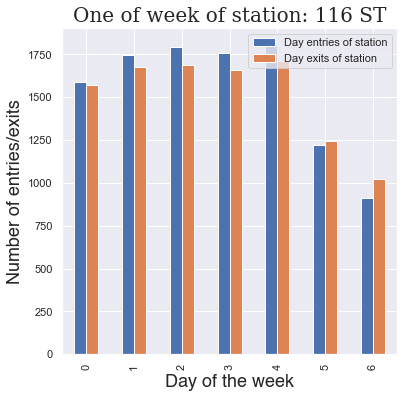

In [ ]:
#Ploting a station daily entries/exits for each day
df = pd.DataFrame({"Day entries of station":STA1["Day entries of station"],"Day exits of station":STA1["Day exits of station"]})
df.reset_index(inplace=True,drop=True)
csfont = {'fontname':'serif'}
hfont = {'fontname':'Helvetica'}
fig = df.plot(kind="bar", figsize=(6,6),legend=True)
fig.axes.set_title("One of week of station: 116 ST",fontsize=20,**csfont)
fig.axes.set_xlabel("Day of the week", fontsize=18, **hfont)
fig.axes.set_ylabel("Number of entries/exits", fontsize=18, **hfont)

Text(0, 0.5, 'Number of entries/exits')

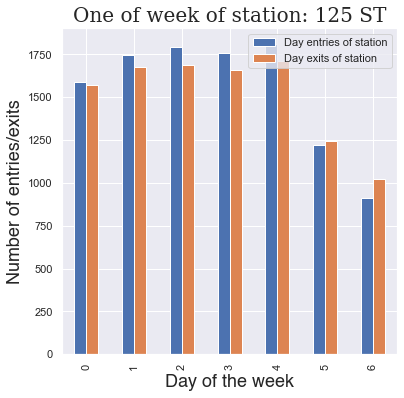

In [ ]:
df = pd.DataFrame({"Day entries of station":STA1["Day entries of station"],"Day exits of station":STA1["Day exits of station"]})
df.reset_index(inplace=True,drop=True)
csfont = {'fontname':'serif'}
hfont = {'fontname':'Helvetica'}
fig = df.plot(kind="bar", figsize=(6,6),legend=True)
fig.axes.set_title("One of week of station: 125 ST",fontsize=20,**csfont)
fig.axes.set_xlabel("Day of the week", fontsize=18, **hfont)
fig.axes.set_ylabel("Number of entries/exits", fontsize=18, **hfont)

Text(0, 0.5, 'Number of entries/exits')

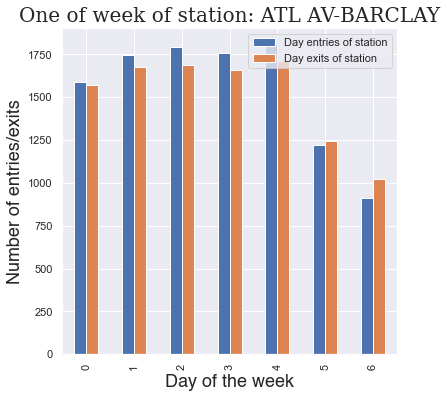

In [ ]:
df = pd.DataFrame({"Day entries of station":STA1["Day entries of station"],"Day exits of station":STA1["Day exits of station"]})
df.reset_index(inplace=True,drop=True)
csfont = {'fontname':'serif'}
hfont = {'fontname':'Helvetica'}
fig = df.plot(kind="bar", figsize=(6,6),legend=True)
fig.axes.set_title("One of week of station: ATL AV-BARCLAY",fontsize=20,**csfont)
fig.axes.set_xlabel("Day of the week", fontsize=18, **hfont)
fig.axes.set_ylabel("Number of entries/exits", fontsize=18, **hfont)

## Checking hourly traffic for top stations

In [ ]:
turnstiles_df

,STATION,TURNSTILE ID,DATE_TIME,ENTRIES,EXITS,Previous_Entries,Previous_EXITS,Hourly_Entries,Hourly_EXITS
2382096,JOURNAL SQUARE,JOURNAL SQUARE R552 PTH03 00-00-07,2021-05-04 06:11:42,407376,108528,408275,108543,899,15
2144926,GRD CNTRL-42 ST,GRD CNTRL-42 ST R046 R238 00-06-01,2021-08-03 16:00:00,424125,287219,425024,287556,899,337
885603,59 ST COLUMBUS,59 ST COLUMBUS R084 N051 02-00-00,2021-06-15 16:00:00,15825569,2296354,15826468,2296513,899,159
2775064,PARKCHESTER,PARKCHESTER R222 R417 00-00-00,2021-06-08 05:00:00,11934360,703254,11935259,703269,899,15
25279,103 ST-CORONA,103 ST-CORONA R208 R529 00-00-03,2021-05-14 04:00:00,2159469,810589,2160368,810601,899,12
...,...,...,...,...,...,...,...,...,...
1695322,CITY HALL,CITY HALL R087 A047 00-03-01,2021-05-19 00:00:00,875543,200133,875543,200134,0,1
1695316,CITY HALL,CITY HALL R087 A047 00-03-01,2021-05-18 00:00:00,875384,200090,875384,200091,0,1
1695311,CITY HALL,CITY HALL R087 A047 00-03-01,2021-05-17 04:00:00,875248,200059,875248,200059,0,0
1695293,CITY HALL,CITY HALL R087 A047 00-03-01,2021-05-14 04:00:00,874923,199987,874923,199987,0,0


In [ ]:
top20stations = turnstiles_df[turnstiles_df.STATION.isin(MTA_vaccine_Table_65.STATION)]
top20hourly = top20stations.copy()
top20hourly["WEEKDAY"] = top20hourly.DATE_TIME.dt.dayofweek
top20hourly["TIME"] = top20hourly.DATE_TIME.dt.hour

In [ ]:
top20hourly = top20hourly.groupby(["STATION",top20hourly.DATE_TIME.dt.week, "WEEKDAY", "TIME"])[["Hourly_Entries","Hourly_EXITS"]].mean()
#top20hourly.reset_index(inplace=True)

/var/folders/0r/78x4fk3n76q1x_swj64_76f40000gn/T/ipykernel_4145/3386708843.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  top20hourly = top20hourly.groupby(["STATION",top20hourly.DATE_TIME.dt.week, "WEEKDAY", "TIME"])[["Hourly_Entries","Hourly_EXITS"]].mean()


In [ ]:
top20hourly.head(100)

Hourly_Entries  Hourly_EXITS
STATION DATE_TIME WEEKDAY TIME                              
116 ST  16        5       1                  4            11
                          5                 45            43
                          9                103            93
                          13               138           129
                          17                94           115
...                                        ...           ...
        18        6       17                62            83
                          21                25            46
        19        0       1                  3            10
                          5                130            95
                          9                108            99

[100 rows x 2 columns]

In [ ]:
top20hourly=top20hourly.reset_index()

In [ ]:
top20hourly.rename(columns={"DATE_TIME":"WeekNumber"}, inplace=True)

In [ ]:
top20hourly

,STATION,WeekNumber,WEEKDAY,TIME,Hourly_Entries,Hourly_EXITS
0,116 ST,16,5,1,4,11
1,116 ST,16,5,5,45,43
2,116 ST,16,5,9,103,93
3,116 ST,16,5,13,138,129
4,116 ST,16,5,17,94,115
...,...,...,...,...,...,...
17411,SUTPHIN-ARCHER,34,4,4,217,105
17412,SUTPHIN-ARCHER,34,4,8,198,143
17413,SUTPHIN-ARCHER,34,4,12,158,184
17414,SUTPHIN-ARCHER,34,4,16,162,260


In [ ]:
#picking random station for weekdays
STA1 = top20hourly[(top20hourly.STATION=="116 ST") &  (top20hourly.WEEKDAY<= 4) ]
STA2 = top20hourly[(top20hourly.STATION=="125 ST") &  (top20hourly.WEEKDAY<= 4) ]
STA3 = top20hourly[(top20hourly.STATION=="ATL AV-BARCLAY") &  (top20hourly.WEEKDAY<= 4) ]

In [ ]:
STA1

,STATION,WeekNumber,WEEKDAY,TIME,Hourly_Entries,Hourly_EXITS
12,116 ST,17,0,1,5,10
13,116 ST,17,0,5,127,100
14,116 ST,17,0,9,104,103
15,116 ST,17,0,13,171,140
16,116 ST,17,0,17,114,131
...,...,...,...,...,...,...
752,116 ST,34,4,5,115,84
753,116 ST,34,4,9,124,110
754,116 ST,34,4,13,166,179
755,116 ST,34,4,17,115,130


/Users/yazeed/miniforge3/envs/MLenva/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/yazeed/miniforge3/envs/MLenva/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/yazeed/miniforge3/envs/MLenva/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an e

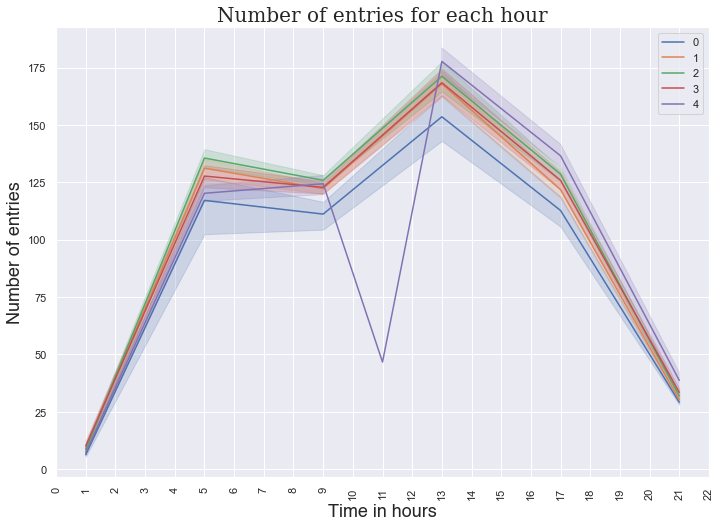

In [ ]:
#ploting entries of each hour
fig, ax = plt.subplots()
for day in range(0,7):
  sns.lineplot(STA1[STA1.WEEKDAY==day].TIME, STA1[STA1.WEEKDAY==day].Hourly_Entries, ax=ax, label=day);
  sns.set(rc={'figure.figsize':(11.7,8.27)})
  ax.set_title("Number of entries for each hour",fontsize=20,**csfont)
  ax.set_xlabel("Time in hours", fontsize=18, **hfont)
  ax.set_ylabel("Number of entries", fontsize=18, **hfont)
  ax.set_xticks(range(0,23));
plt.xticks(rotation = 90);

/Users/yazeed/miniforge3/envs/MLenva/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/yazeed/miniforge3/envs/MLenva/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/yazeed/miniforge3/envs/MLenva/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an e

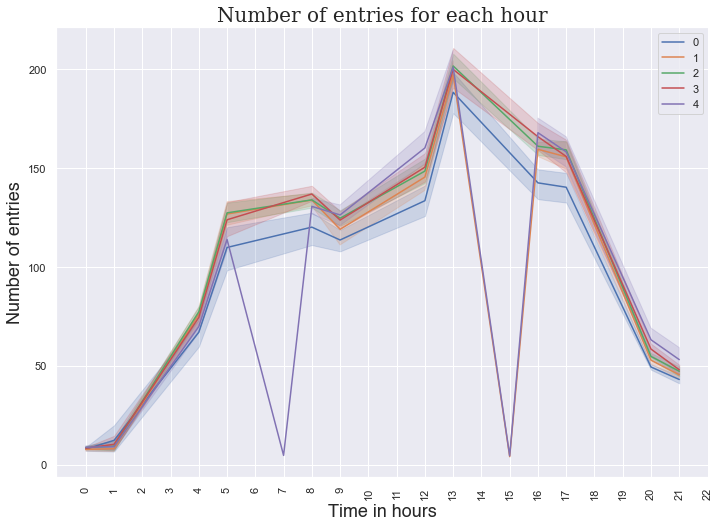

In [ ]:
#ploting entries of each hour
fig, ax = plt.subplots()
for day in range(0,7):
  sns.lineplot(STA2[STA2.WEEKDAY==day].TIME, STA2[STA2.WEEKDAY==day].Hourly_Entries, ax=ax, label=day);
  sns.set(rc={'figure.figsize':(11.7,8.27)})
  ax.set_title("Number of entries for each hour",fontsize=20,**csfont)
  ax.set_xlabel("Time in hours", fontsize=18, **hfont)
  ax.set_ylabel("Number of entries", fontsize=18, **hfont)
  ax.set_xticks(range(0,23));
plt.xticks(rotation = 90);

/Users/yazeed/miniforge3/envs/MLenva/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/yazeed/miniforge3/envs/MLenva/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/yazeed/miniforge3/envs/MLenva/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an e

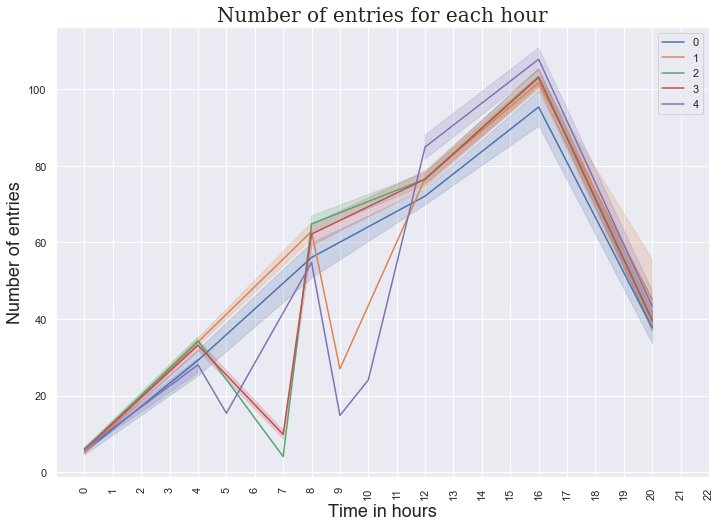

In [ ]:
#ploting entries of each hour

fig, ax = plt.subplots()
for day in range(0,7):
  sns.lineplot(STA3[STA3.WEEKDAY==day].TIME, STA3[STA3.WEEKDAY==day].Hourly_Entries, ax=ax, label=day);
  sns.set(rc={'figure.figsize':(11.7,8.27)})
  ax.set_title("Number of entries for each hour",fontsize=20,**csfont)
  ax.set_xlabel("Time in hours", fontsize=18, **hfont)
  ax.set_ylabel("Number of entries", fontsize=18, **hfont)
  ax.set_xticks(range(0,23));
plt.xticks(rotation = 90);

--------------------------------------------------------------------------------------------------

# Is it affective to remove the outliers of each station?

In [ ]:
turnstiles_df

,STATION,TURNSTILE ID,DATE_TIME,ENTRIES,Previous_Entries,Fixed_Hourly_Entries
85060,121 ST,121 ST R009 J037 00-06-01,2021-07-09 04:00:00,1946295307,1946276017,1946276017
2652264,HUNTS POINT AV,HUNTS POINT AV R146 R412 00-00-00,2021-05-10 13:00:00,146668647,1123536132,146668647
2288596,FORDHAM RD,FORDHAM RD R112 N217 00-00-02,2021-06-07 12:00:00,687970041,19471254,19471254
2653020,HUNTS POINT AV,HUNTS POINT AV R146 R412 00-00-01,2021-05-10 13:00:00,1191143076,12134201,12134201
841349,46 ST BLISS ST,46 ST BLISS ST R223 R520 01-06-00,2021-06-03 12:00:00,13942393,8899046,8899046
...,...,...,...,...,...,...
1450012,ASTORIA BLVD,ASTORIA BLVD R094 R514 00-05-00,2021-07-03 20:00:00,262228,262228,0
1450011,ASTORIA BLVD,ASTORIA BLVD R094 R514 00-05-00,2021-07-03 16:00:00,262228,262228,0
1450010,ASTORIA BLVD,ASTORIA BLVD R094 R514 00-05-00,2021-07-03 12:00:00,262228,262228,0
1450009,ASTORIA BLVD,ASTORIA BLVD R094 R514 00-05-00,2021-07-03 08:00:00,262228,262228,0


In [ ]:
station = turnstiles_df.copy()

In [ ]:
station

,STATION,TURNSTILE ID,DATE_TIME,ENTRIES,Previous_Entries,Fixed_Hourly_Entries
85060,121 ST,121 ST R009 J037 00-06-01,2021-07-09 04:00:00,1946295307,1946276017,1946276017
2652264,HUNTS POINT AV,HUNTS POINT AV R146 R412 00-00-00,2021-05-10 13:00:00,146668647,1123536132,146668647
2288596,FORDHAM RD,FORDHAM RD R112 N217 00-00-02,2021-06-07 12:00:00,687970041,19471254,19471254
2653020,HUNTS POINT AV,HUNTS POINT AV R146 R412 00-00-01,2021-05-10 13:00:00,1191143076,12134201,12134201
841349,46 ST BLISS ST,46 ST BLISS ST R223 R520 01-06-00,2021-06-03 12:00:00,13942393,8899046,8899046
...,...,...,...,...,...,...
1450012,ASTORIA BLVD,ASTORIA BLVD R094 R514 00-05-00,2021-07-03 20:00:00,262228,262228,0
1450011,ASTORIA BLVD,ASTORIA BLVD R094 R514 00-05-00,2021-07-03 16:00:00,262228,262228,0
1450010,ASTORIA BLVD,ASTORIA BLVD R094 R514 00-05-00,2021-07-03 12:00:00,262228,262228,0
1450009,ASTORIA BLVD,ASTORIA BLVD R094 R514 00-05-00,2021-07-03 08:00:00,262228,262228,0


In [ ]:
sts = station.STATION.unique()

In [ ]:
for sta in sts:  
  tmp = station[(station.STATION == sta) & (station.DATE_TIME.dt.weekday <= 4)]
  q3 = tmp.Fixed_Hourly_Entries.quantile(q=0.75)
  q1 = tmp.Fixed_Hourly_Entries.quantile(q=0.25)
  IQR = q3 -  q1
  outlier = (q3 + 1.5 * IQR) 
  index = station[(station.Fixed_Hourly_Entries > outlier) & (station.STATION == sta)].Fixed_Hourly_Entries.index
  station.Fixed_Hourly_Entries.loc[index] = tmp.Fixed_Hourly_Entries.median()

/Users/yazeed/miniforge3/envs/MLenva/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fixed_Hourly_Entries'>

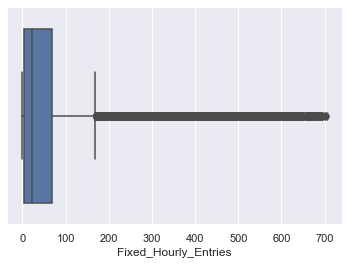

In [ ]:
sns.boxplot(station.Fixed_Hourly_Entries)

In [ ]:
top10 = station.reset_index().groupby("STATION")["Fixed_Hourly_Entries"].sum().reset_index().nlargest(n=15,columns="Fixed_Hourly_Entries")

This conclude compareing the data with MTA offical data of busiest stations is not same as our top10, removing the outliers could removed meaningful information!

In [ ]:
top10

,STATION,Fixed_Hourly_Entries
61,34 ST-PENN STA,4352214
59,34 ST-HERALD SQ,3256149
9,125 ST,3132274
110,86 ST,2907853
46,23 ST,2849891
68,42 ST-PORT AUTH,2721105
217,FLUSHING-MAIN,2686299
14,14 ST-UNION SQ,2644451
257,JKSN HT-ROOSVLT,2592408
353,TIMES SQ-42 ST,2445775
